<h1> EDA of Covid Patient Data </h1>

In [1]:
import numpy as np
import pandas as pd

In [183]:
data = pd.read_excel('../data/covid.xlsx')
data = pd.read_csv('../data/KaggleRawDataEdited - KaggleRawDataEdited.csv')

<h2> Initial Thoughts </h2>

There are N/A values. It may be better to use a mean rather than a 0 because the 0 will obscure the data too much. 

The patients are separated by rows and then the windows are listed. We may need to reorganize for the time series. 

We will definitely be using some sort of ridge regression to reduce the multicollinarity. 



TODO: Figure out what -1 means. 
TODO: Encode the percentiles.

TODO: make a hierarchal model.


Thoughts: for each time series predict whether or not they will end up in the ICU. 


In [184]:
## Group by window, ICU 

grouped_data = data.groupby(['WINDOW', 'ICU']).mean()

In [185]:
grouped_data = grouped_data.reset_index()
grouped_columns = grouped_data.columns

In [186]:
data.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       'IMMUNOCOMPROMISED', 'OTHER', 'ALBUMIN_MEAN', 'BE_ARTERIAL_MEAN',
       'BE_VENOUS_MEAN', 'BIC_ARTERIAL_MEAN', 'BIC_VENOUS_MEAN',
       'BILLIRUBIN_MEAN', 'CALCIUM_MEAN', 'CREATININ_MEAN', 'FFA_MEAN',
       'GGT_MEAN', 'GLUCOSE_MEAN', 'HEMATOCRITE_MEAN', 'HEMOGLOBIN_MEAN',
       'INR_MEAN', 'LACTATE_MEAN', 'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN',
       'NEUTROPHILES_MEAN', 'P02_ARTERIAL_MEAN', 'P02_VENOUS_MEAN',
       'PC02_ARTERIAL_MEAN', 'PC02_VENOUS_MEAN', 'PCR_MEAN',
       'PH_ARTERIAL_MEAN', 'PH_VENOUS_MEAN', 'PLATELETS_MEAN',
       'POTASSIUM_MEAN', 'SAT02_ARTERIAL_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'TGO_MEAN', 'TGP_MEAN', 'TTPA_MEAN', 'UREA_MEAN',
       'DIMER_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTO

In [187]:
## Comparing 0 and 1

icu_patient = data[['PATIENT_VISIT_IDENTIFIER','ICU']].groupby(['PATIENT_VISIT_IDENTIFIER']).sum()

no_icu = icu_patient[icu_patient['ICU'] == 0]
icu = icu_patient[icu_patient['ICU'] > 0]
print(len(no_icu))
print(len(icu))


190
195


<h2> Feature Analysis </h2>

Below is a feature analysis. 

0    0.379603
1    0.250000
Name: GENDER, dtype: float64


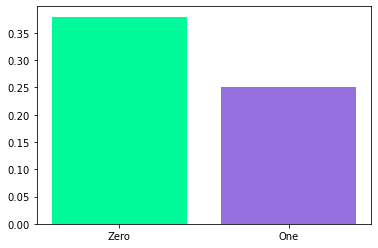

In [188]:
df = grouped_data[grouped_data['WINDOW'] == '0-2']
df = df['GENDER']
print(df)

x = ['0', '1']
zeros = df.iloc[0]
ones = df.iloc[1]
y1 = [zeros]
y2 = [ones]

plt.bar('Zero', y1, color='mediumspringgreen', label='Zero')
plt.bar('One', y2, color='mediumpurple')
plt.show()


<ipython-input-189-bdc7da21a43c>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1 = plt.figure()


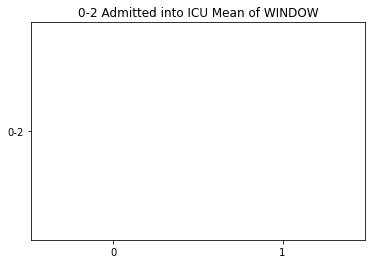

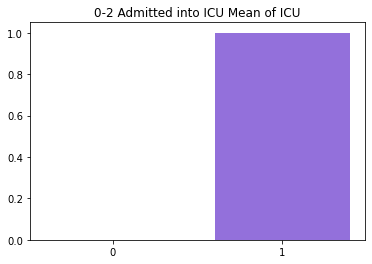

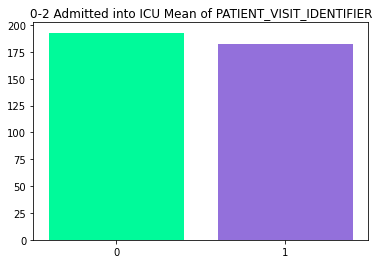

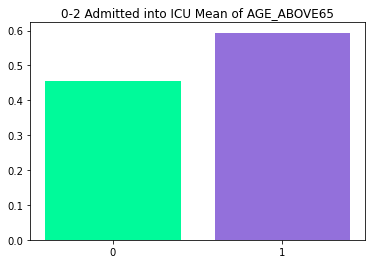

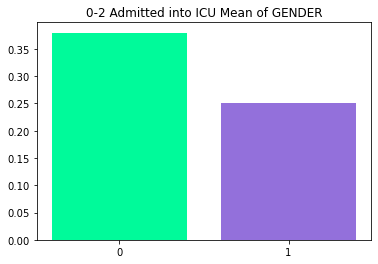

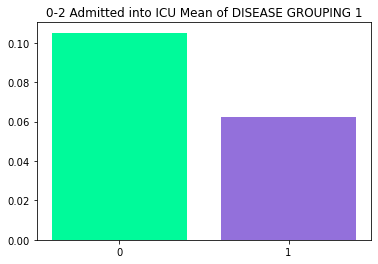

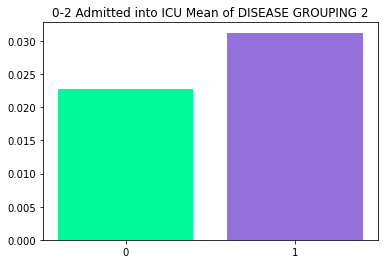

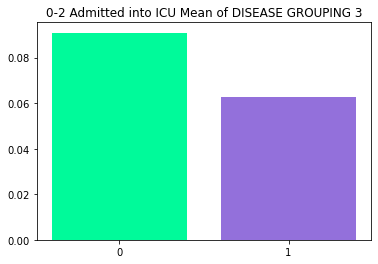

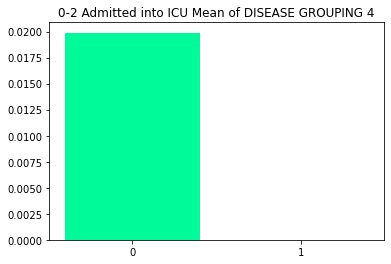

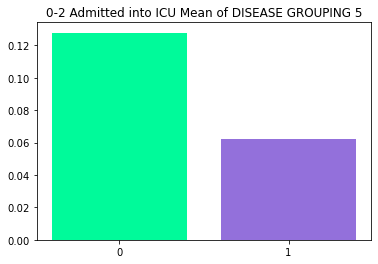

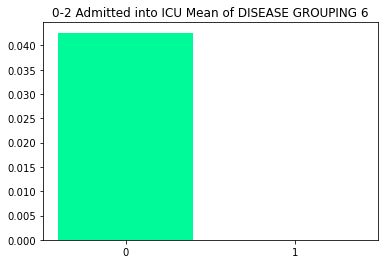

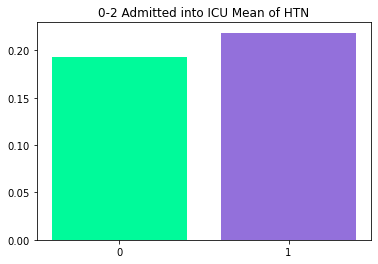

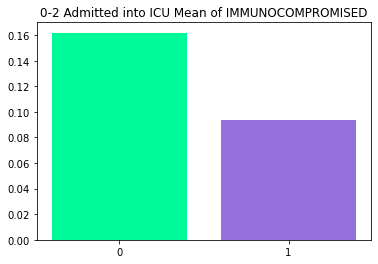

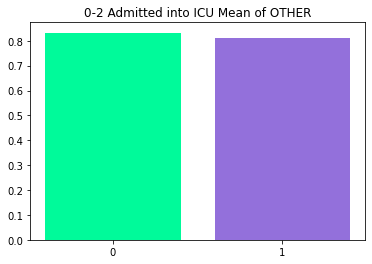

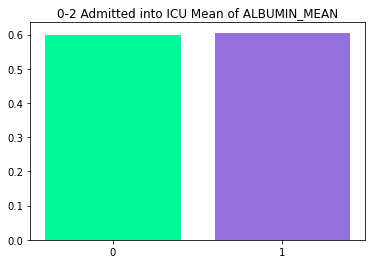

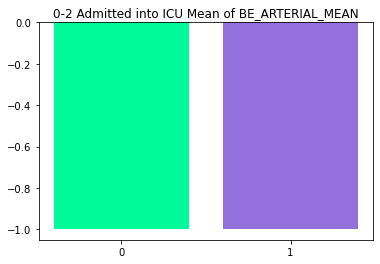

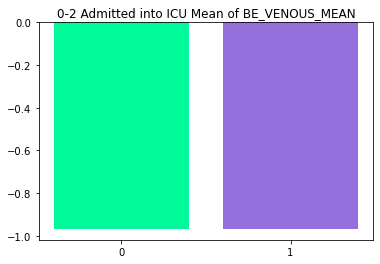

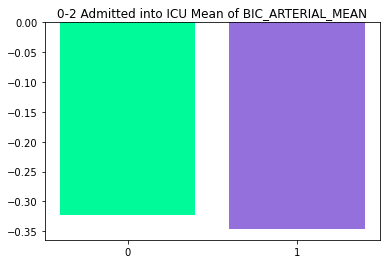

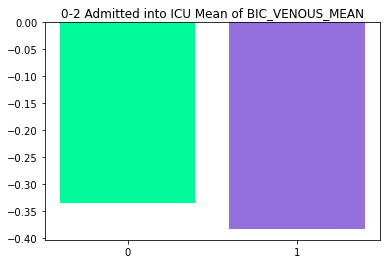

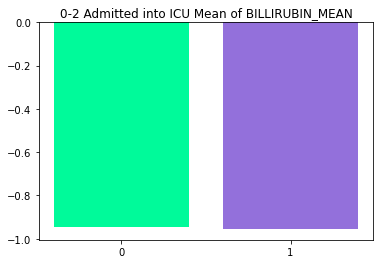

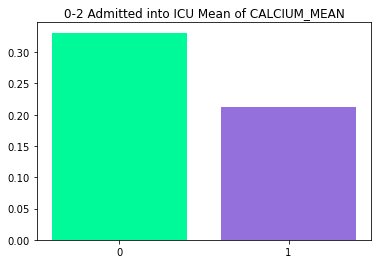

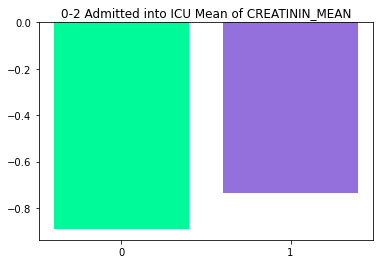

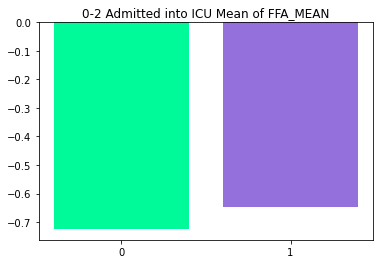

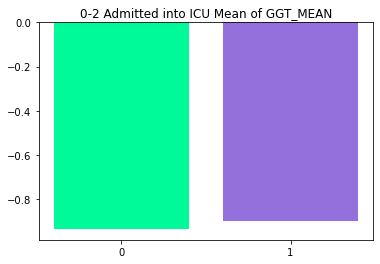

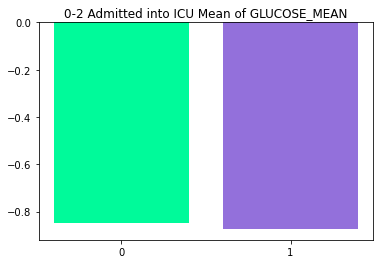

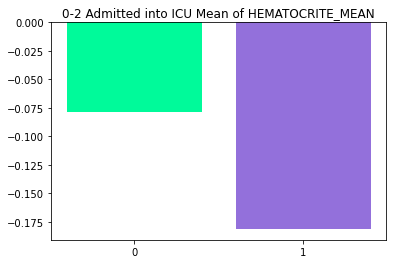

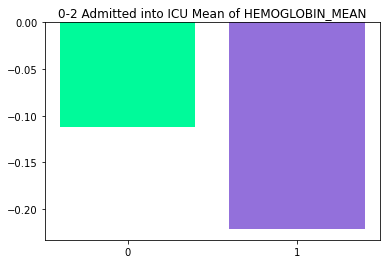

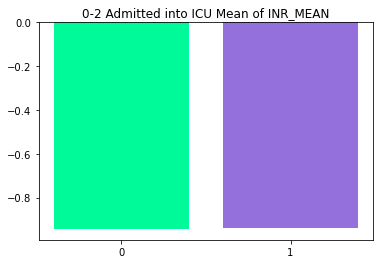

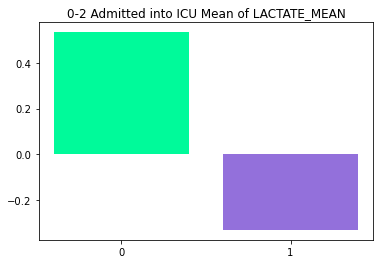

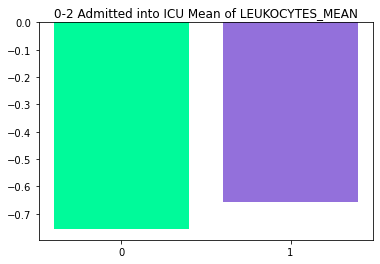

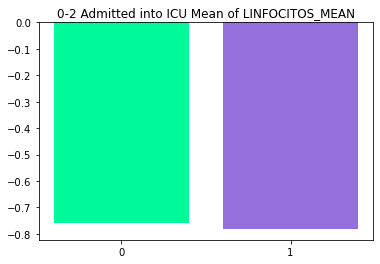

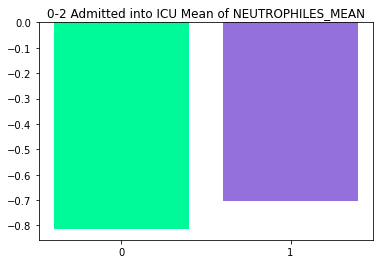

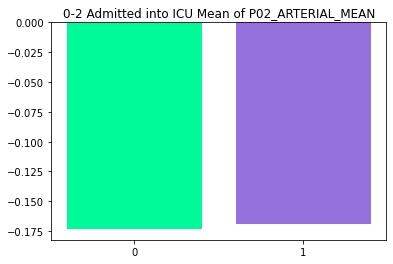

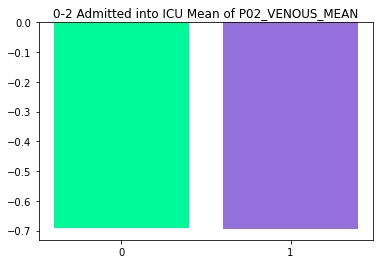

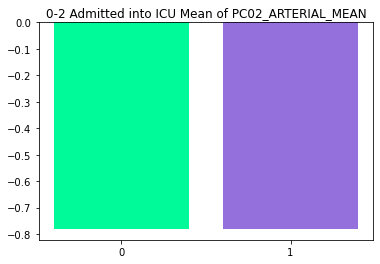

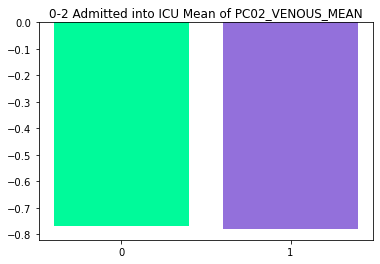

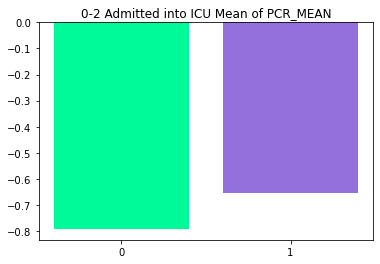

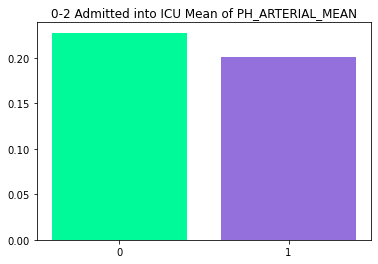

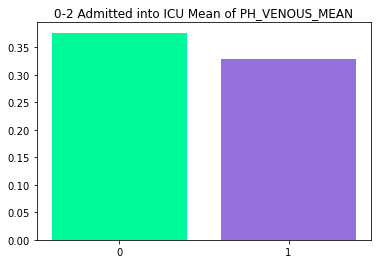

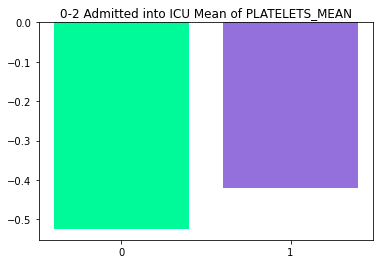

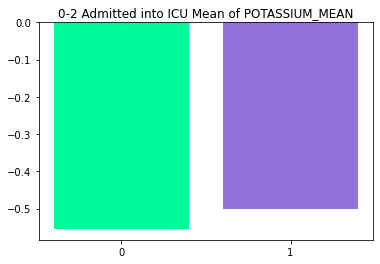

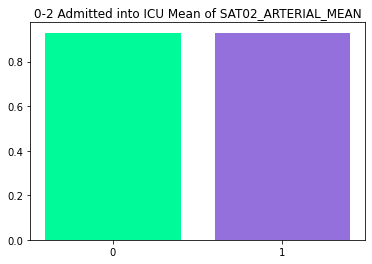

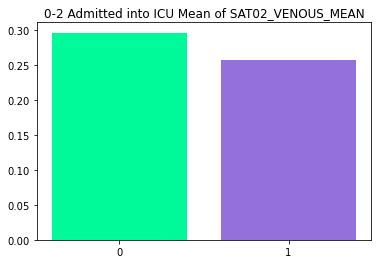

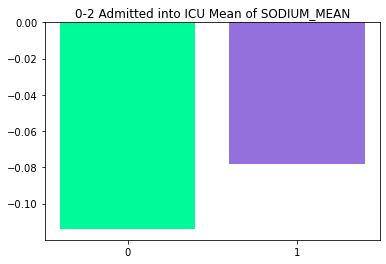

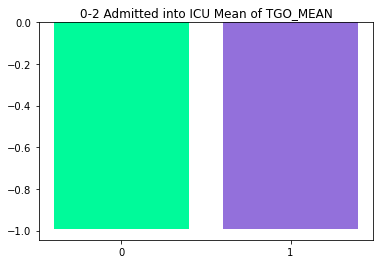

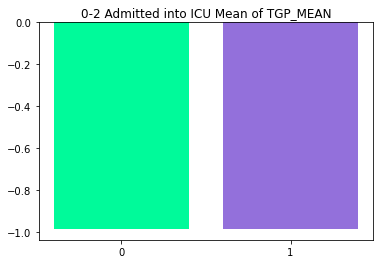

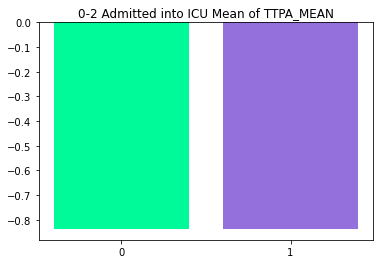

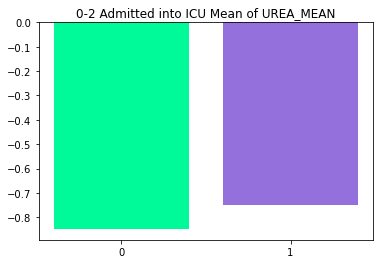

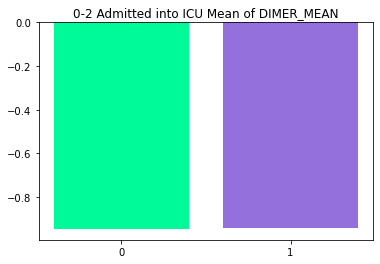

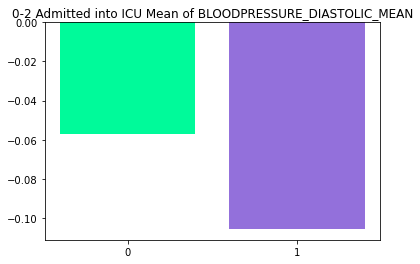

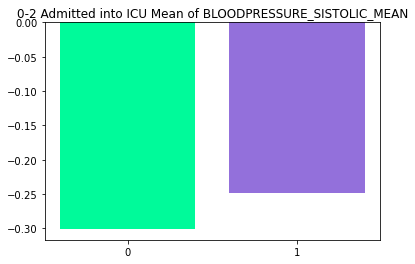

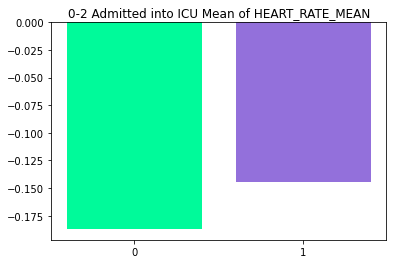

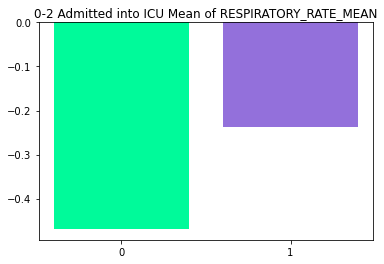

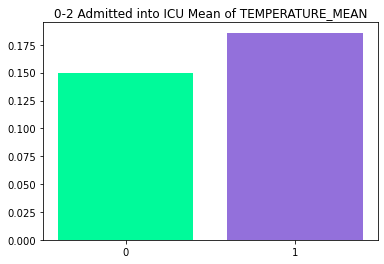

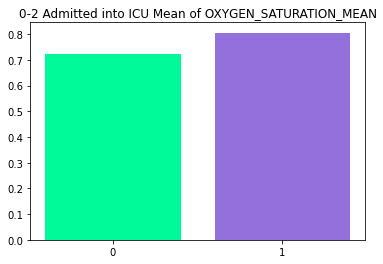

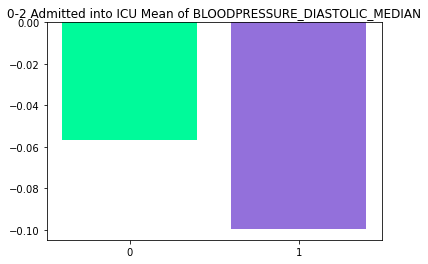

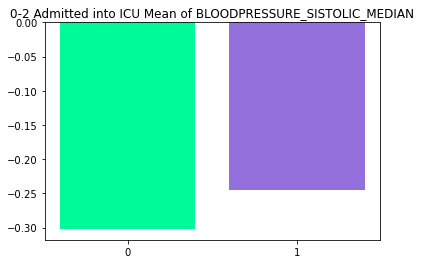

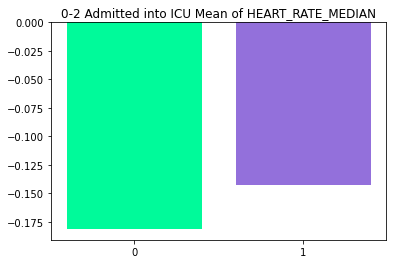

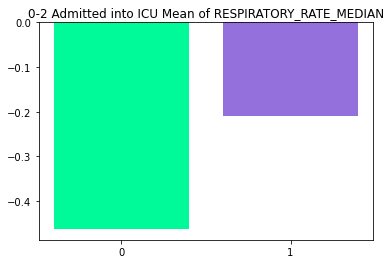

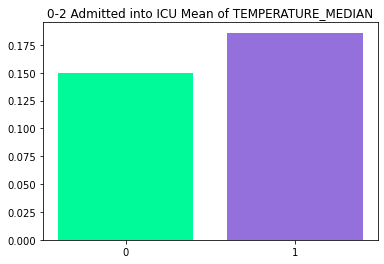

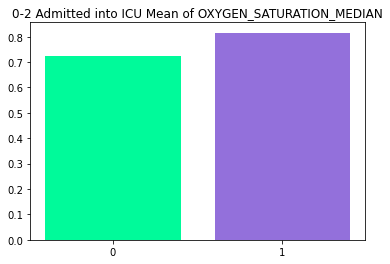

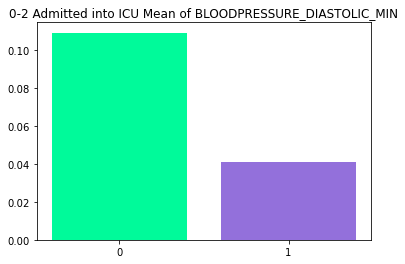

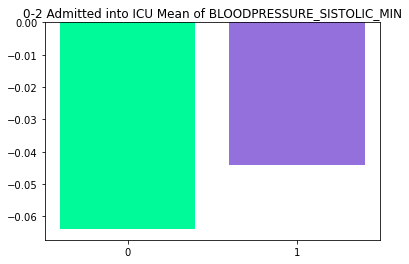

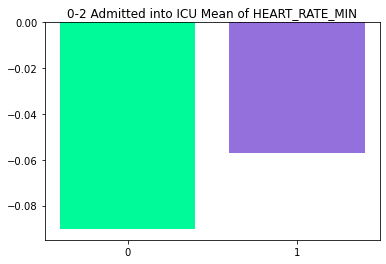

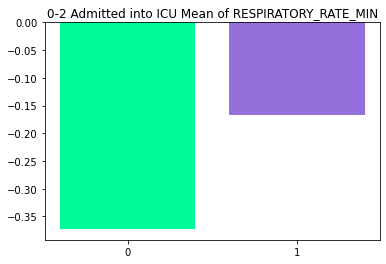

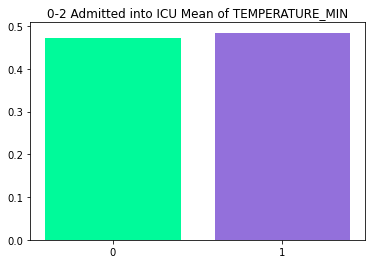

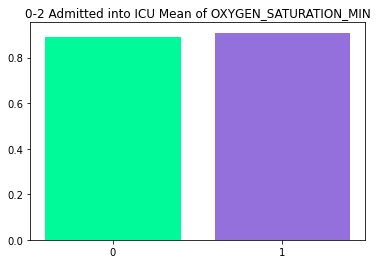

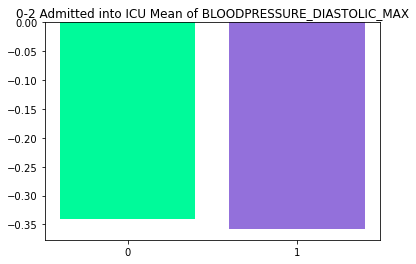

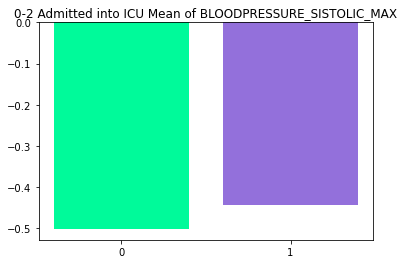

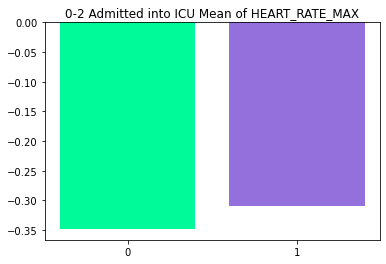

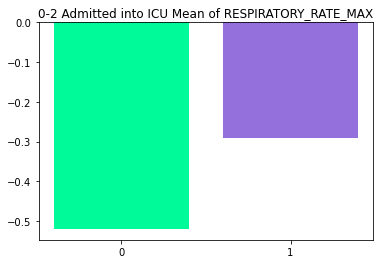

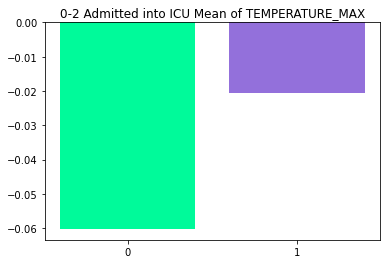

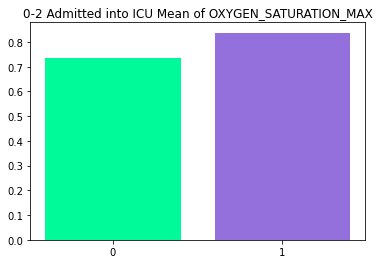

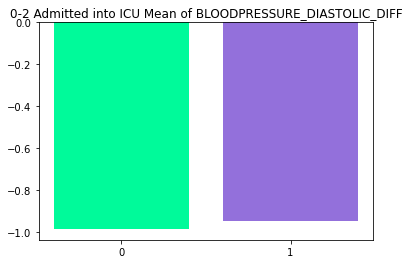

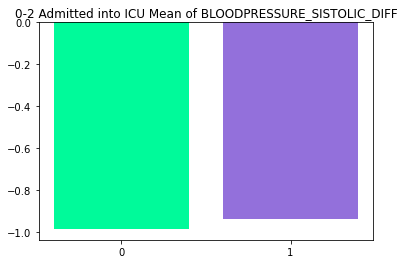

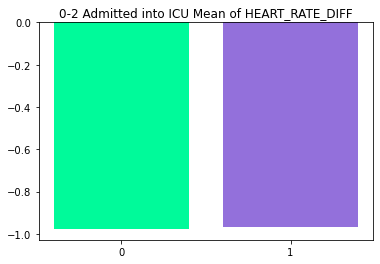

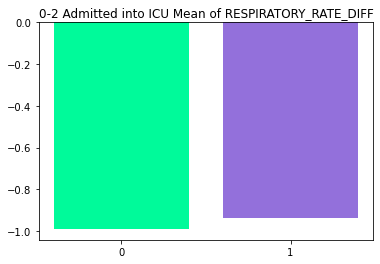

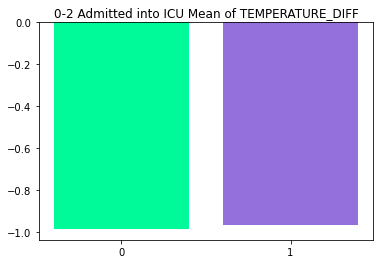

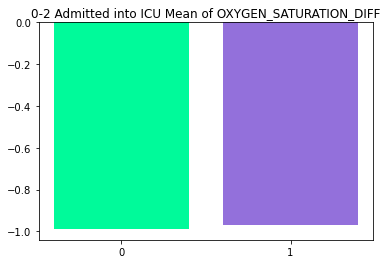

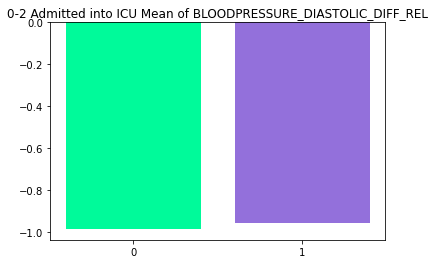

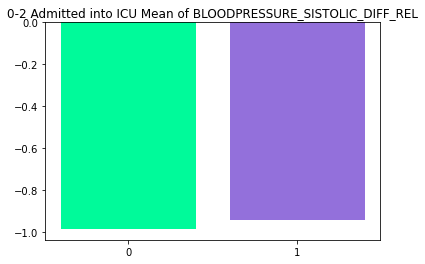

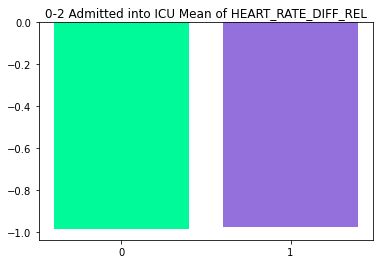

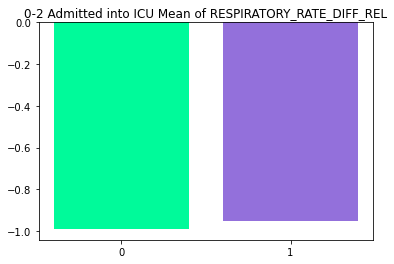

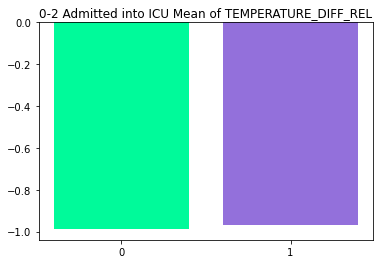

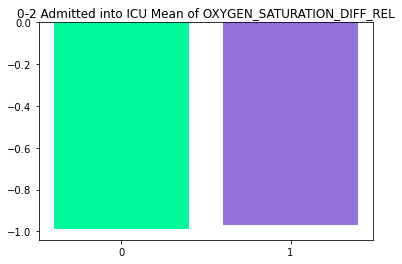

In [189]:
#  Numerical Data
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('../0-2.pdf')
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("../02.pdf")
### for 0-2 group
heart_NUM = grouped_data.columns



g = grouped_data[grouped_data['WINDOW'] == '0-2']
# df = df['GENDER']
# fig = plt.figure(figsize=(14,22))

# fig = plt.figure()
for i in heart_NUM:

    fig1 = plt.figure()
    
    df = g[i]
    
    zeros = df.iloc[0]


    ones = df.iloc[1]

    y1 = [zeros]
    y2 = [ones]


    plt.title(f'0-2 Admitted into ICU Mean of {i}')
    plt.bar('0', y1, color='mediumspringgreen', label='Not Addmitted')
    plt.bar('1', y2, color='mediumpurple', label='Admitted')
    pp.savefig(fig1)
pp.close()
plt.show()


<ipython-input-190-0c9a302d4255>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1 = plt.figure()


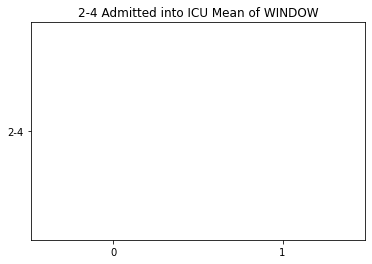

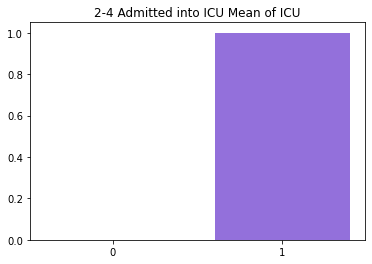

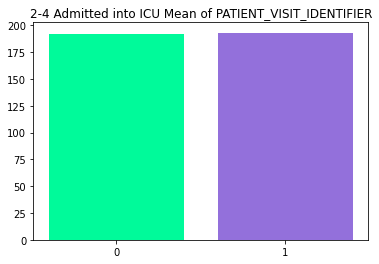

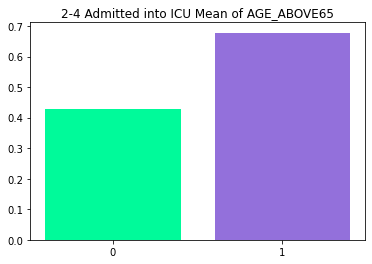

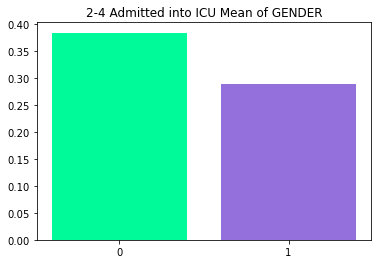

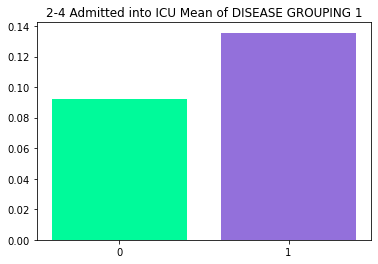

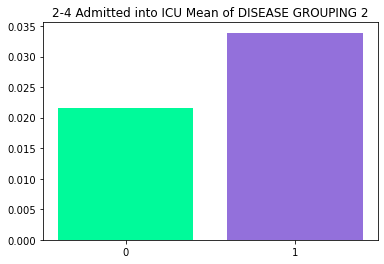

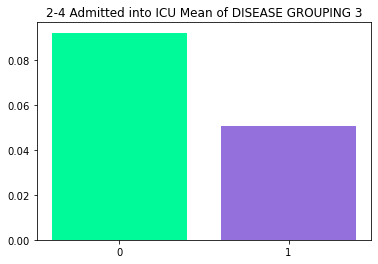

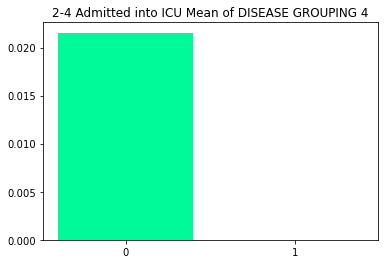

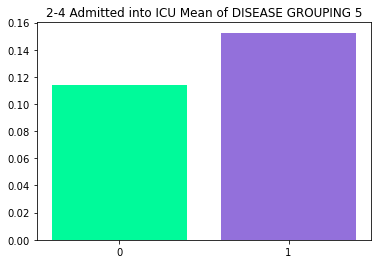

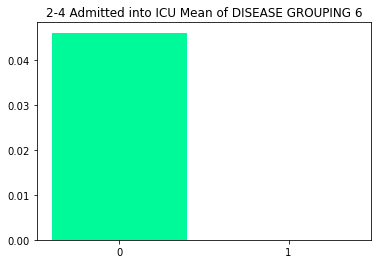

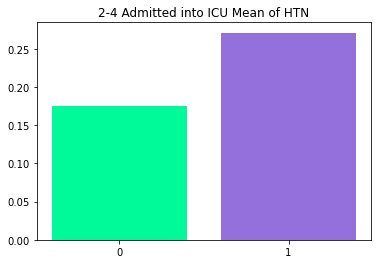

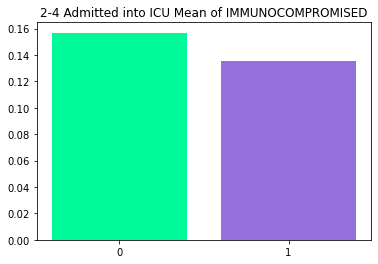

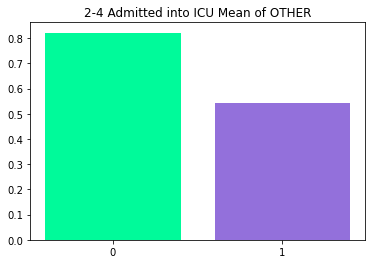

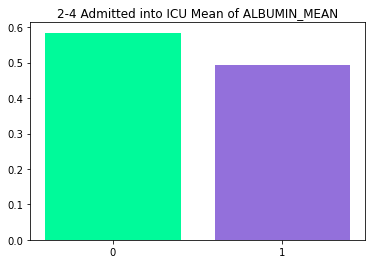

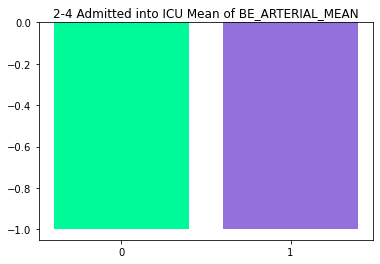

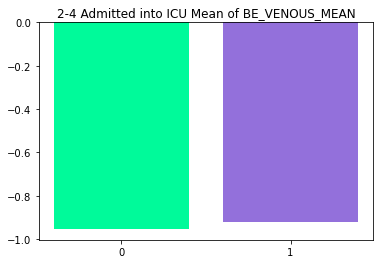

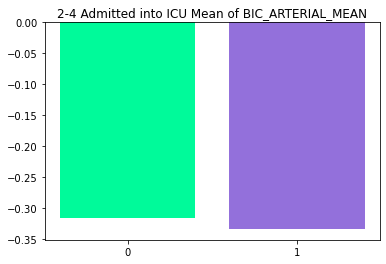

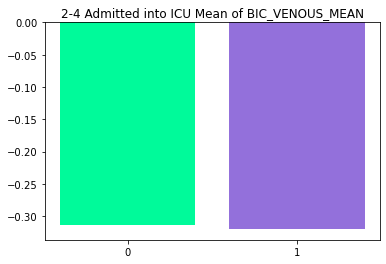

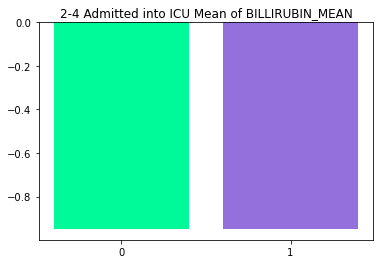

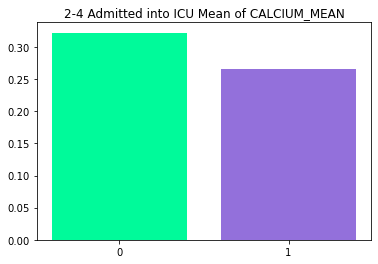

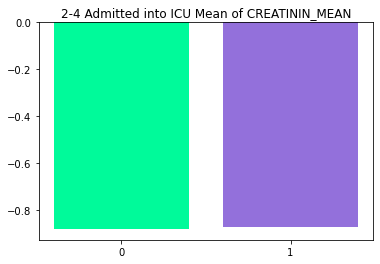

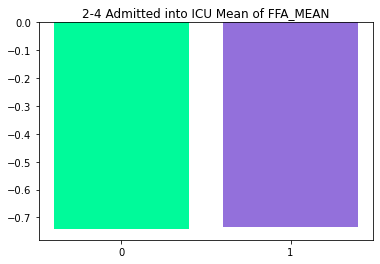

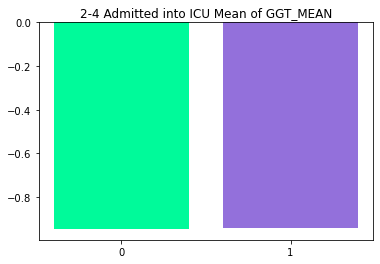

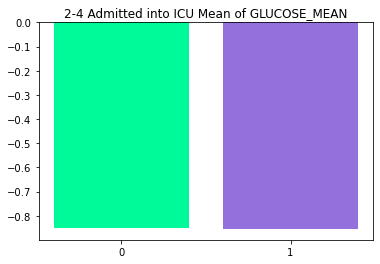

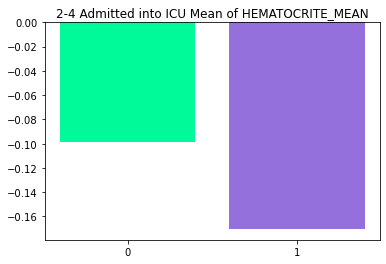

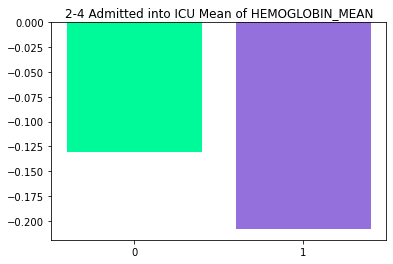

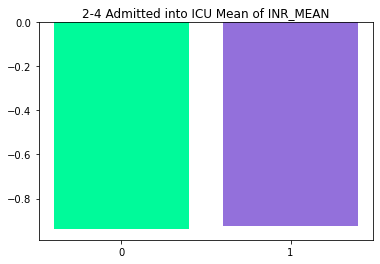

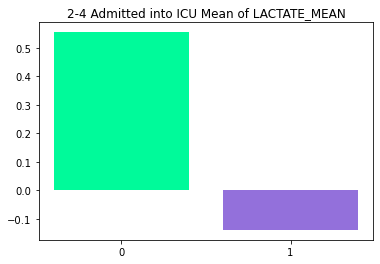

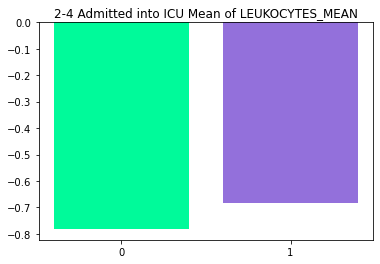

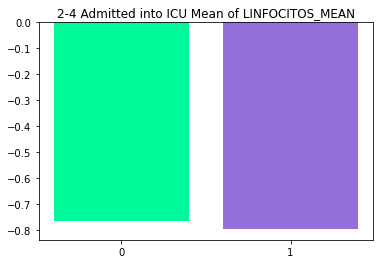

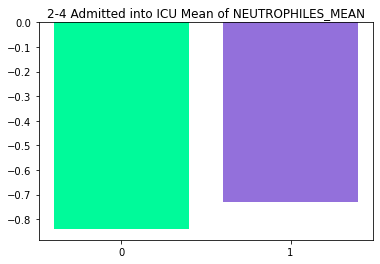

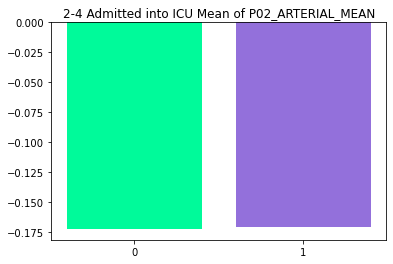

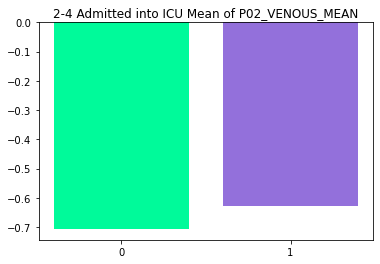

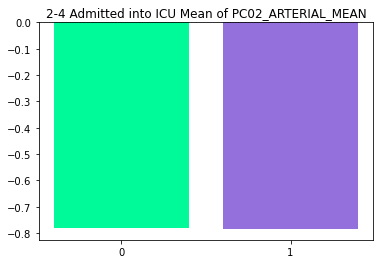

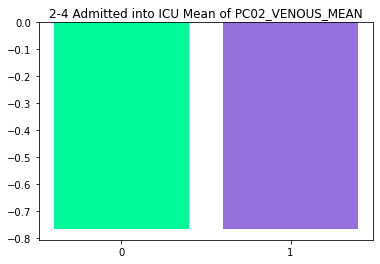

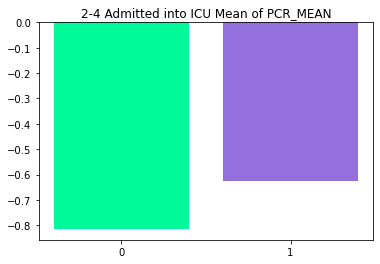

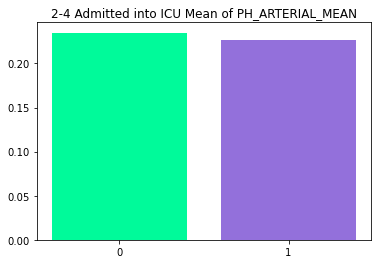

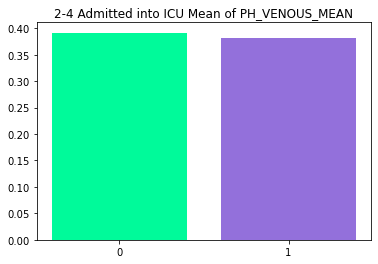

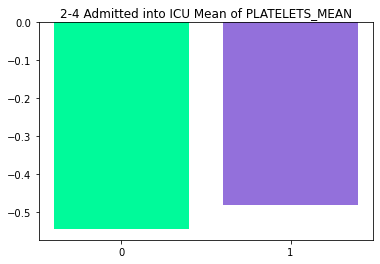

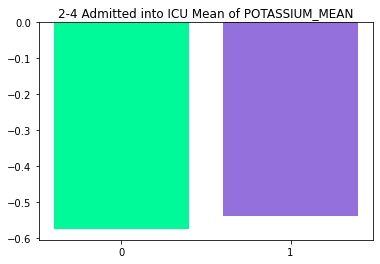

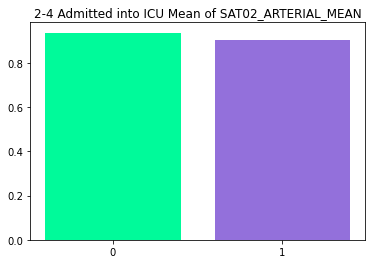

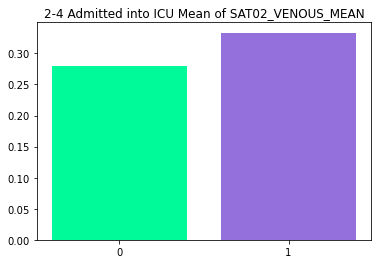

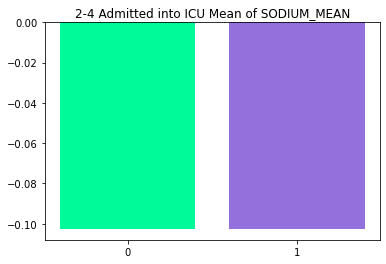

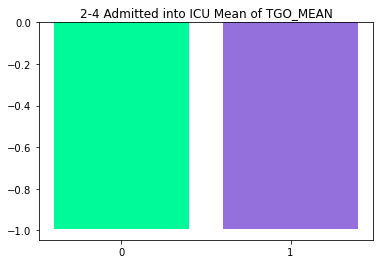

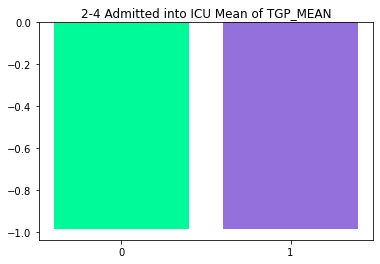

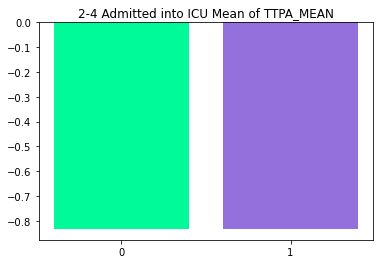

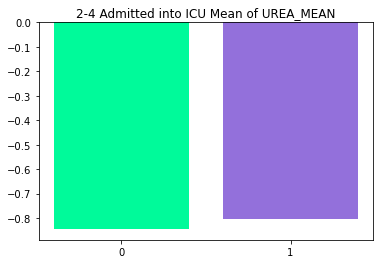

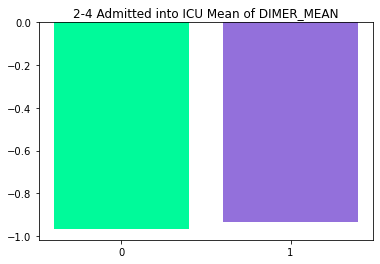

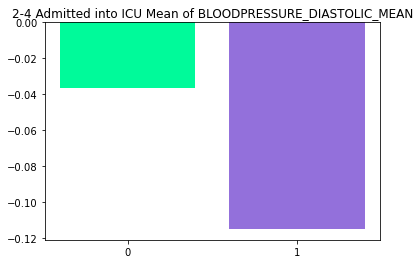

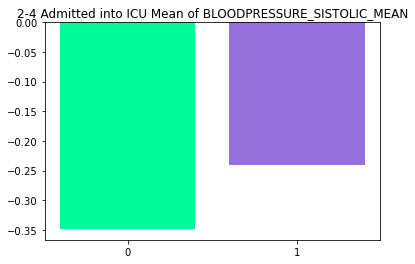

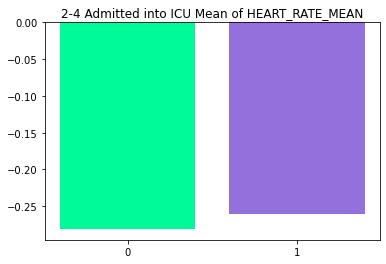

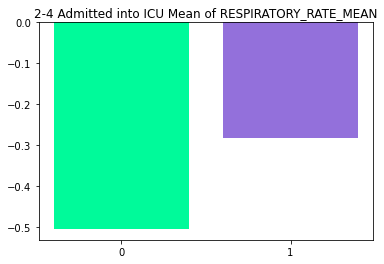

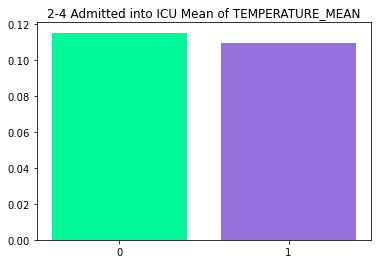

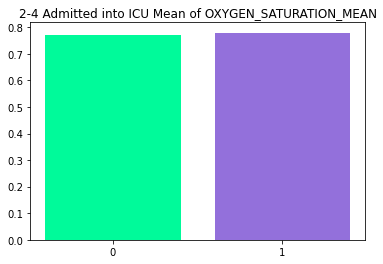

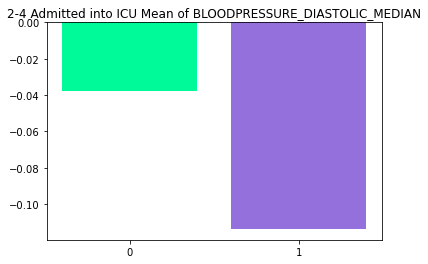

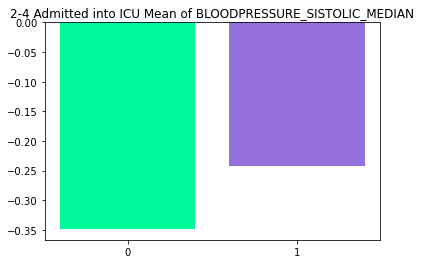

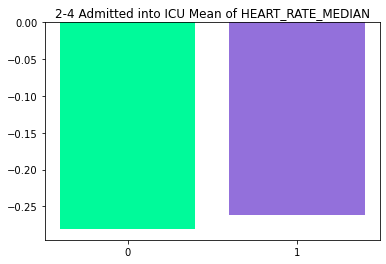

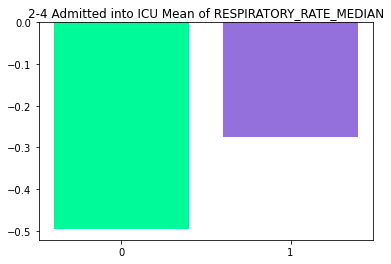

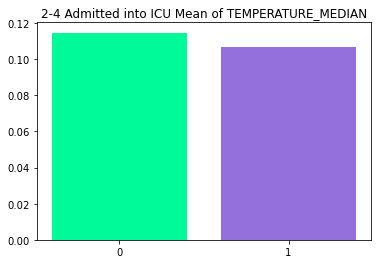

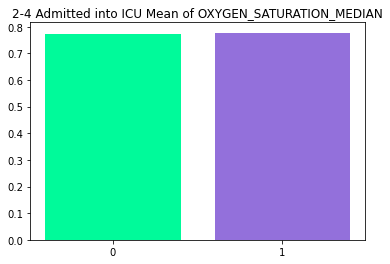

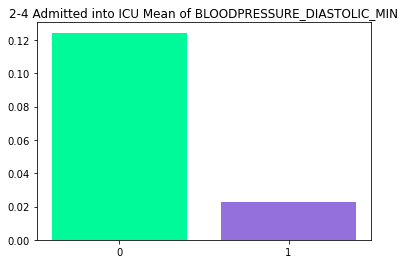

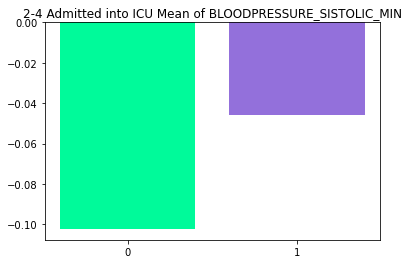

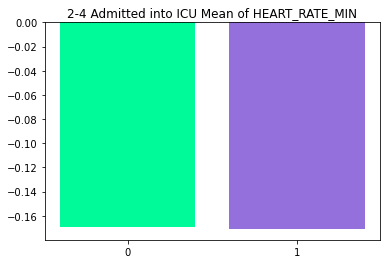

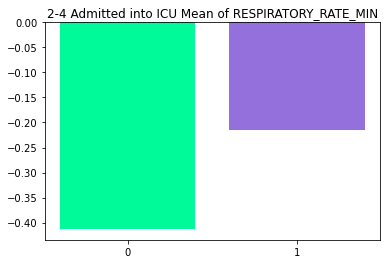

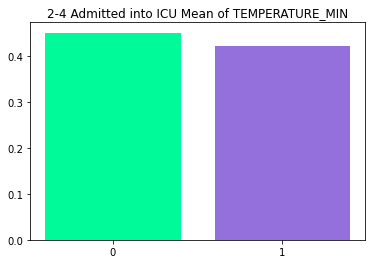

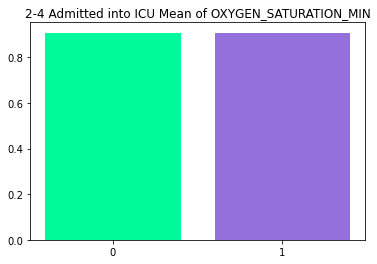

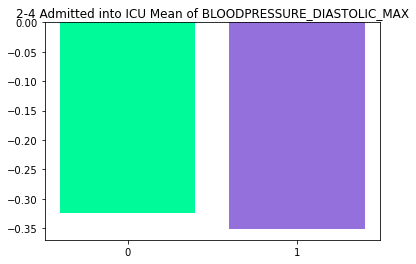

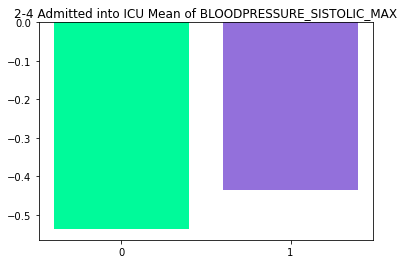

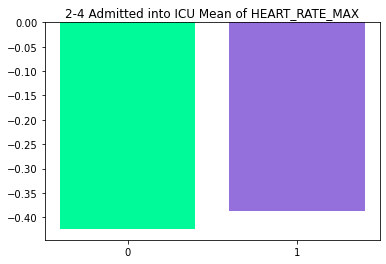

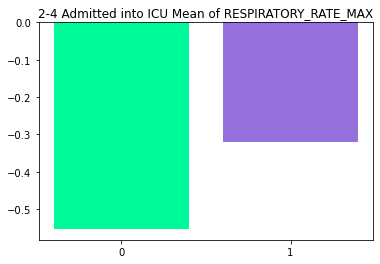

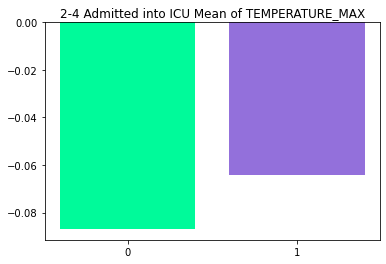

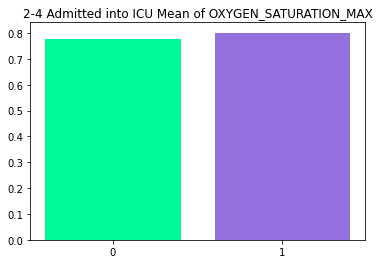

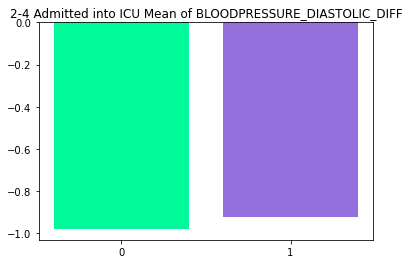

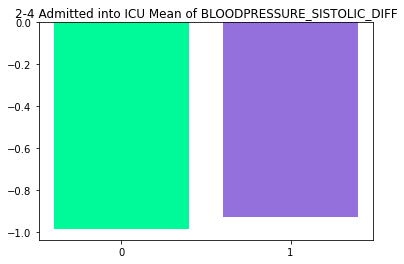

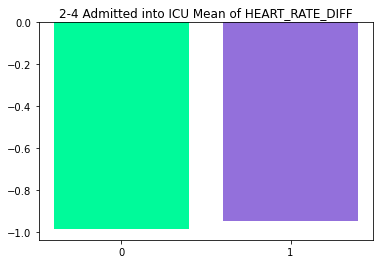

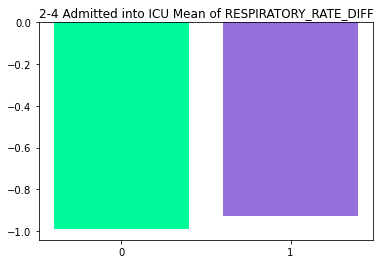

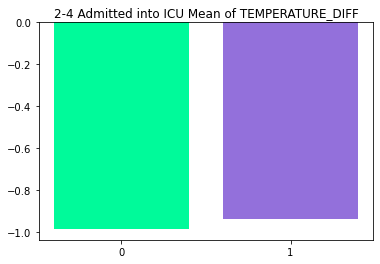

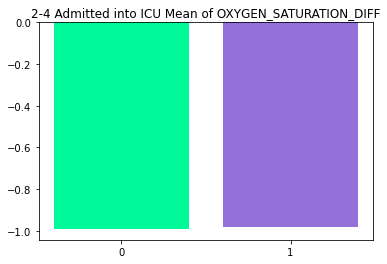

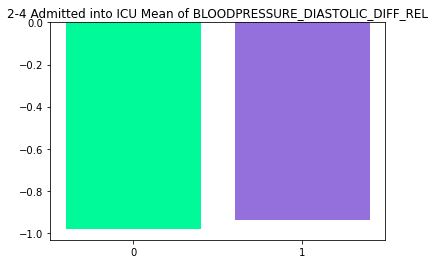

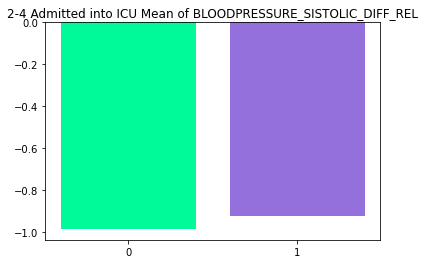

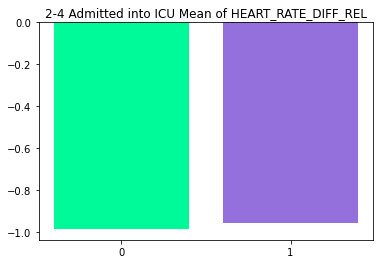

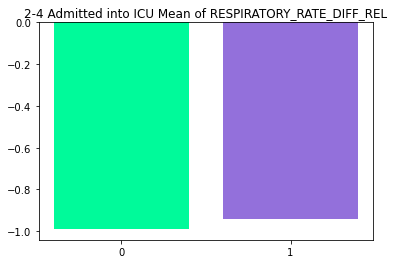

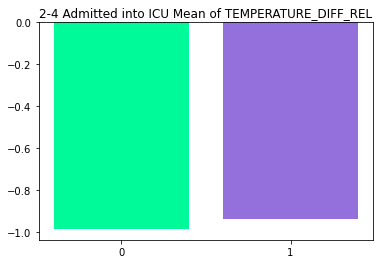

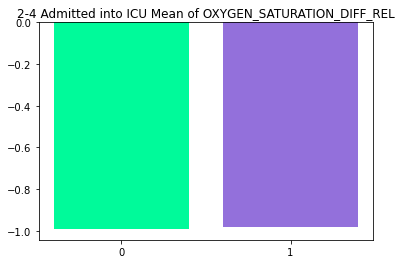

In [190]:
#  Numerical Data
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('../2-4.pdf')
heart_NUM = grouped_data.columns
g = grouped_data[grouped_data['WINDOW'] == '2-4']

for i in heart_NUM:
    fig1 = plt.figure()
    df = g[i]
    zeros = df.iloc[0]
    ones = df.iloc[1]

    y1 = [zeros]
    y2 = [ones]

    plt.title(f'2-4 Admitted into ICU Mean of {i}')
    plt.bar('0', y1, color='mediumspringgreen', label='Not Addmitted')
    plt.bar('1', y2, color='mediumpurple', label='Admitted')
    pp.savefig(fig1)



pp.close()
plt.show()

<ipython-input-191-5c66a25d11de>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1 = plt.figure()


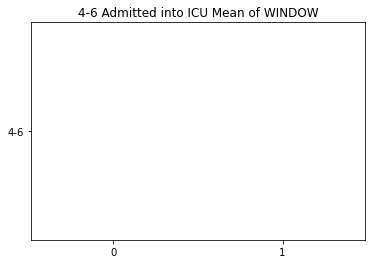

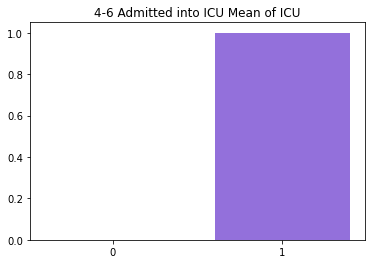

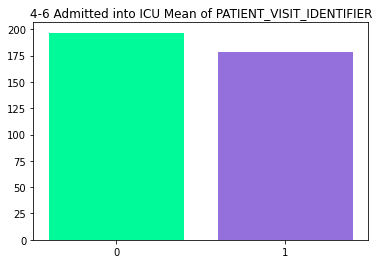

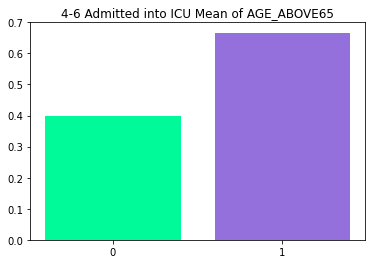

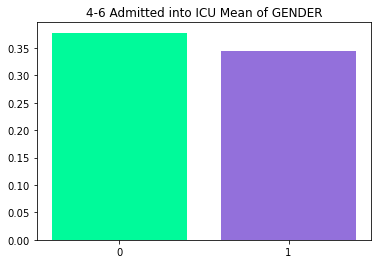

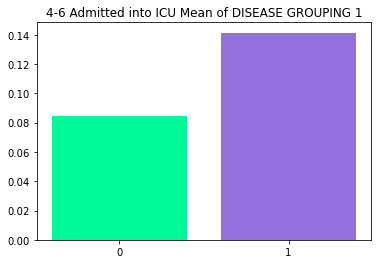

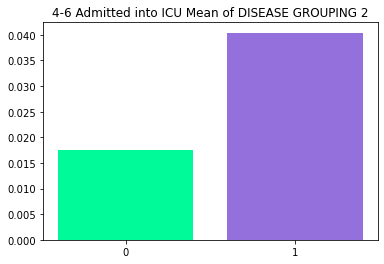

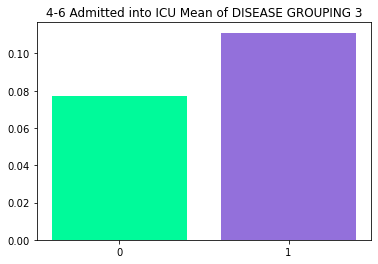

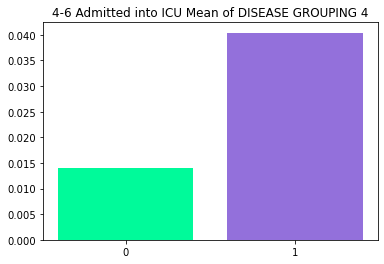

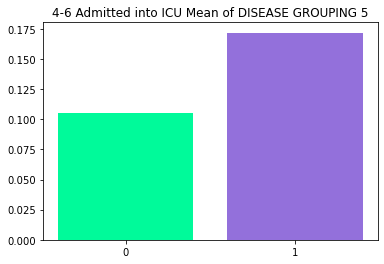

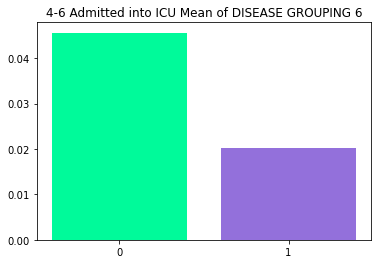

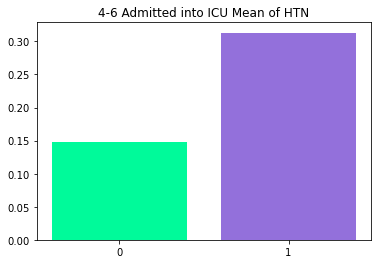

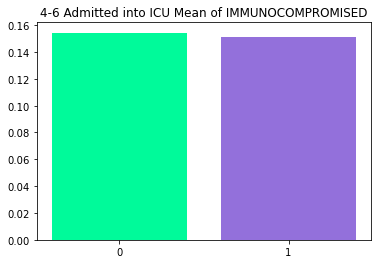

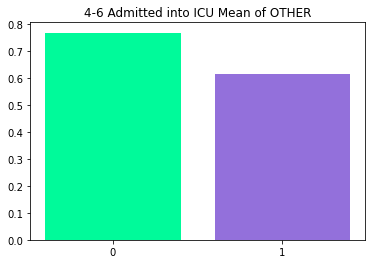

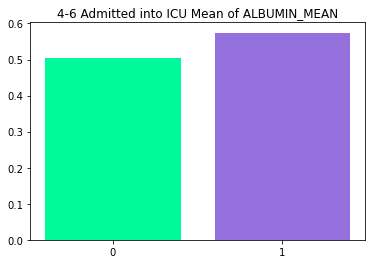

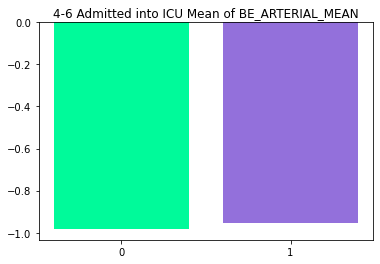

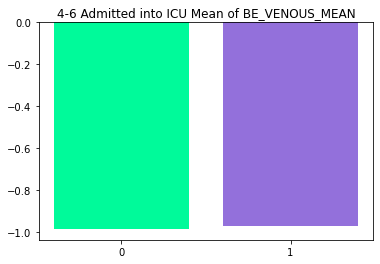

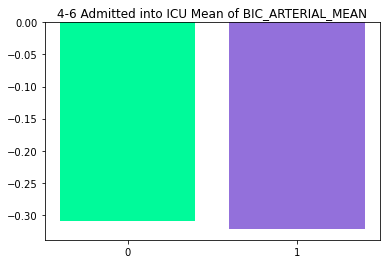

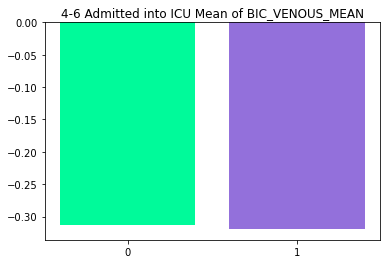

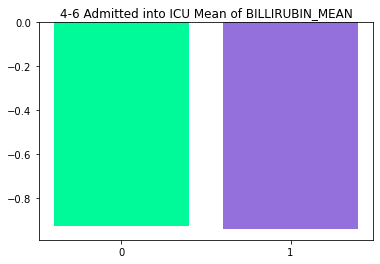

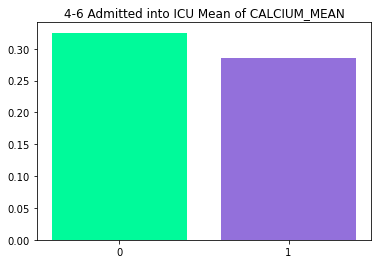

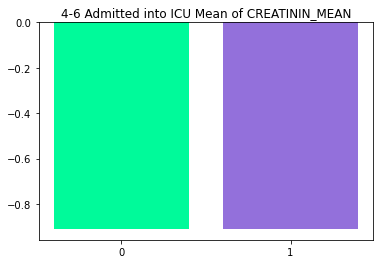

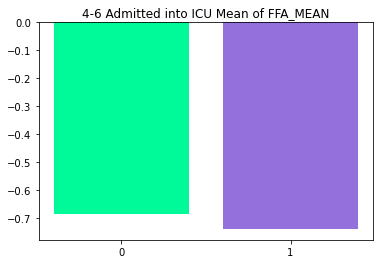

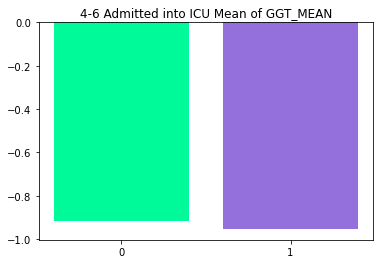

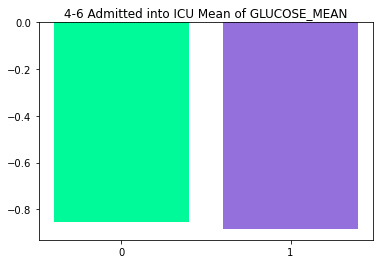

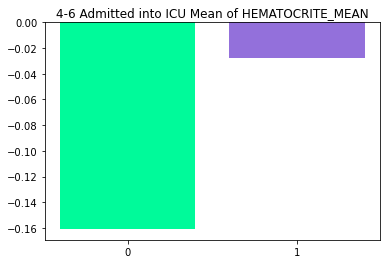

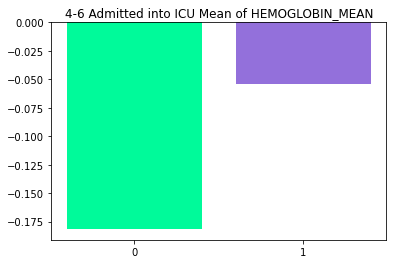

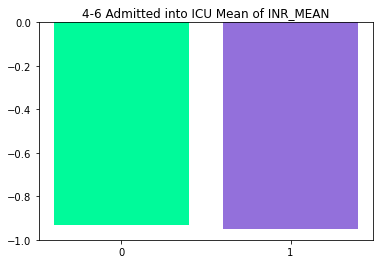

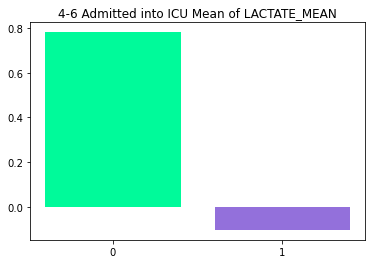

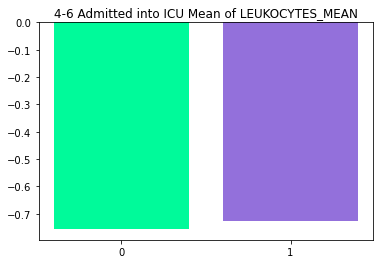

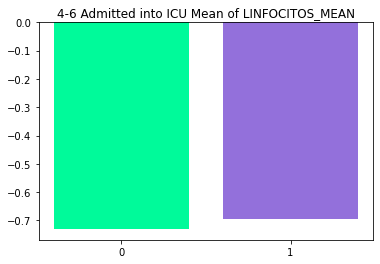

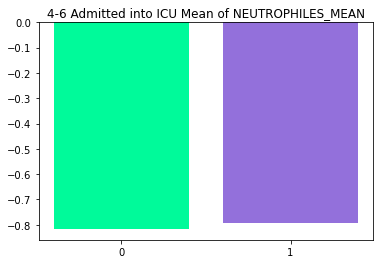

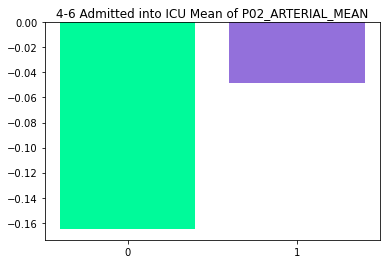

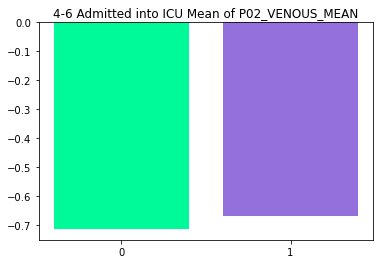

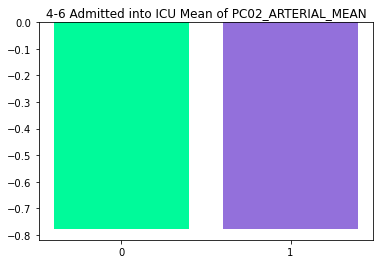

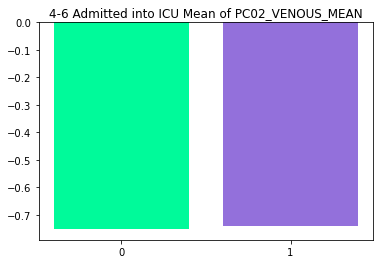

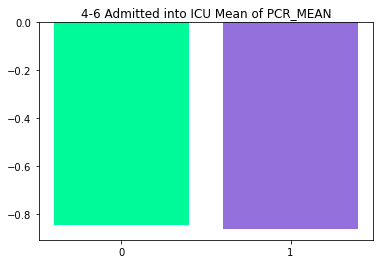

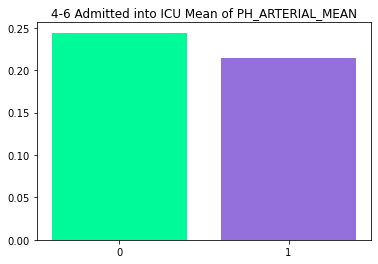

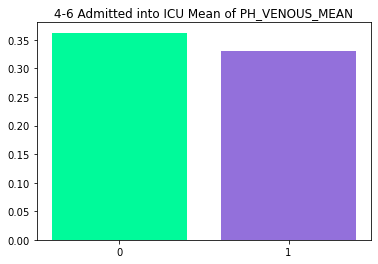

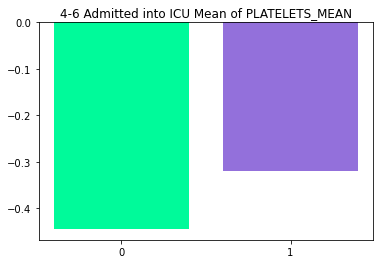

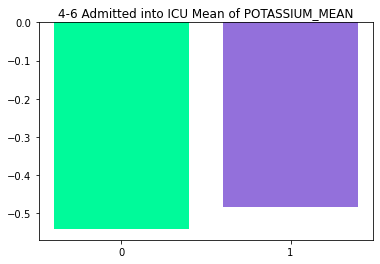

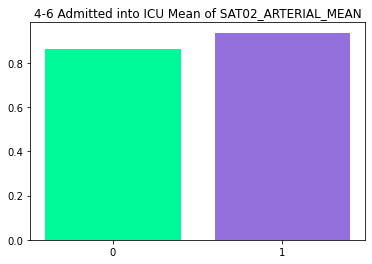

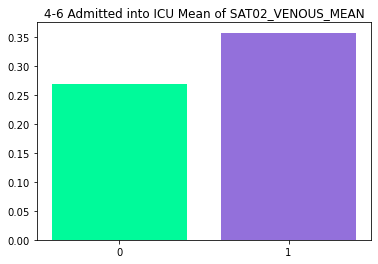

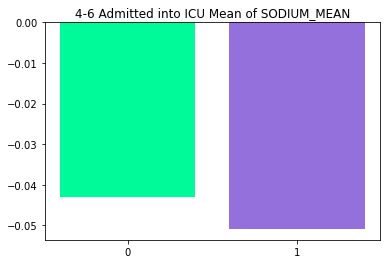

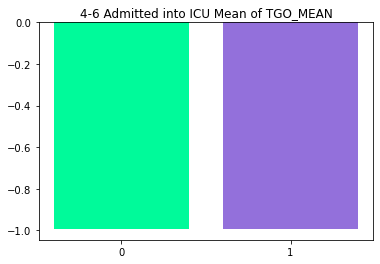

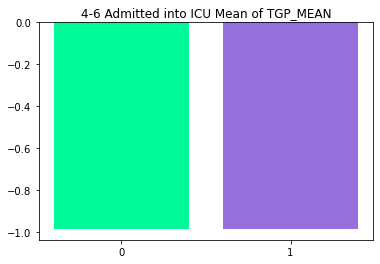

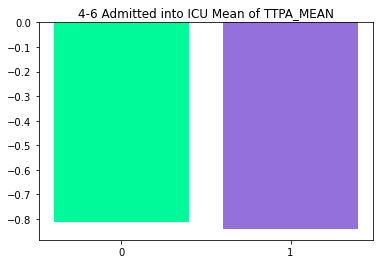

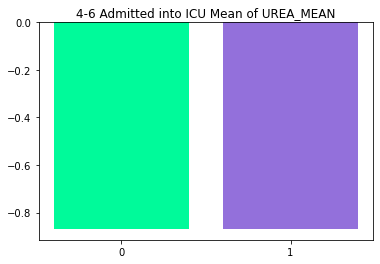

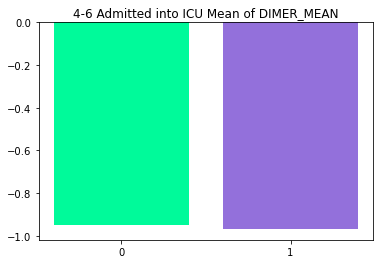

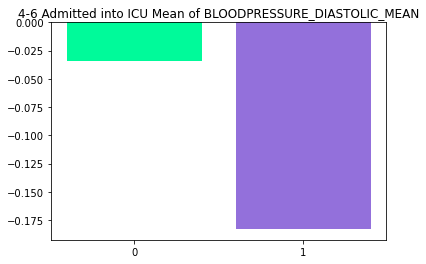

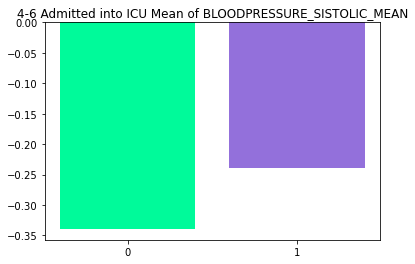

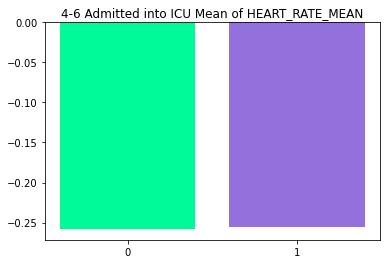

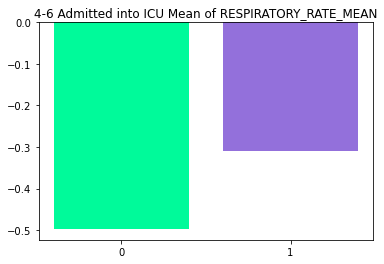

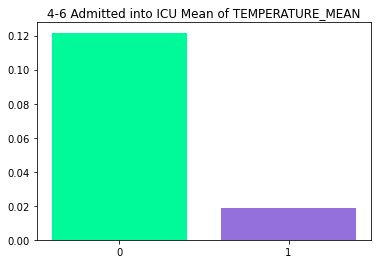

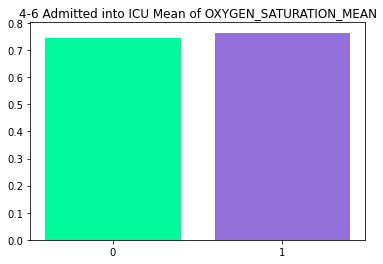

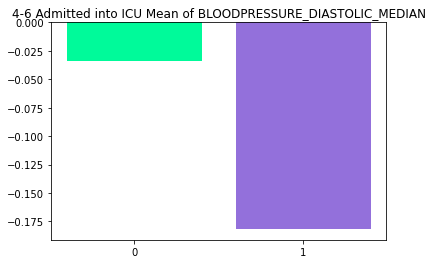

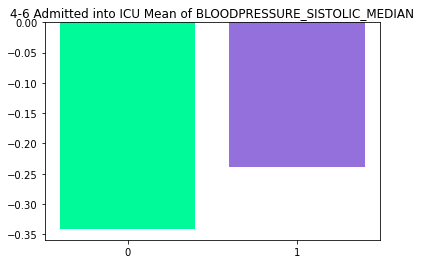

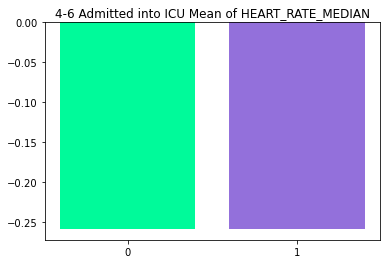

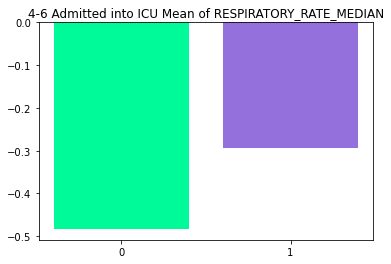

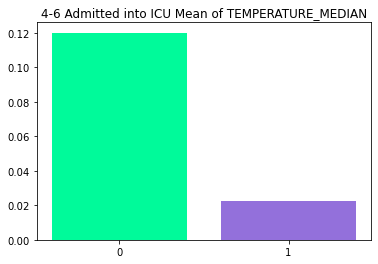

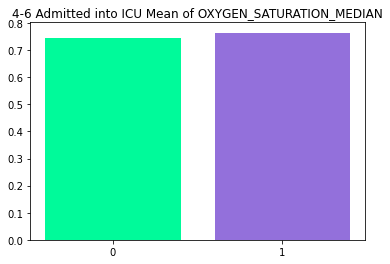

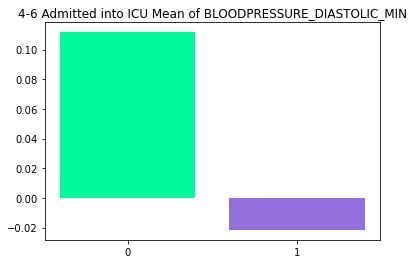

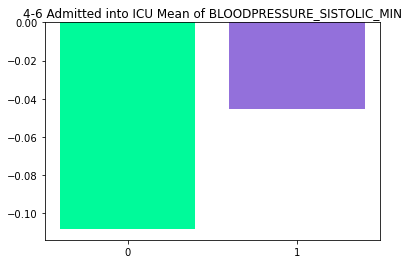

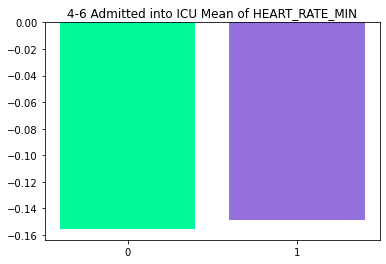

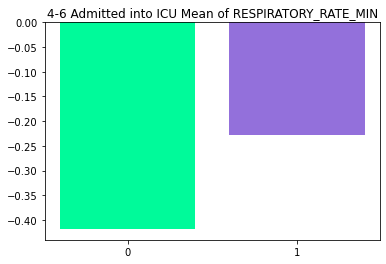

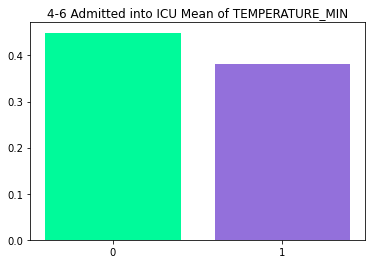

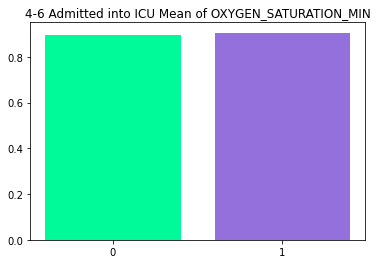

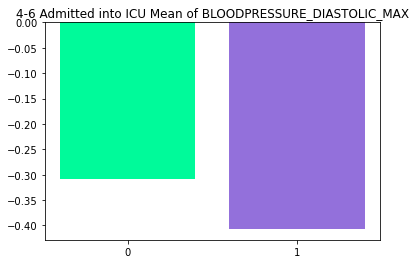

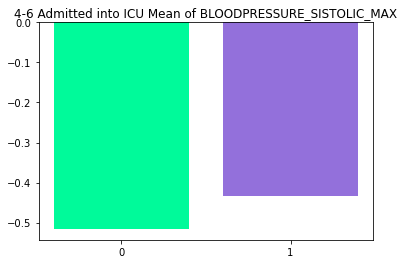

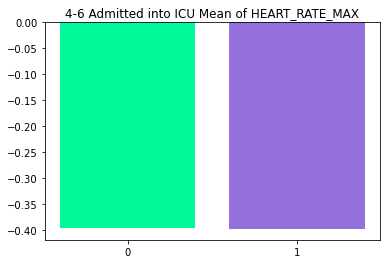

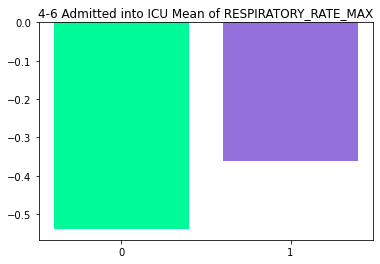

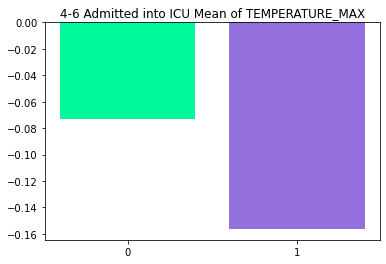

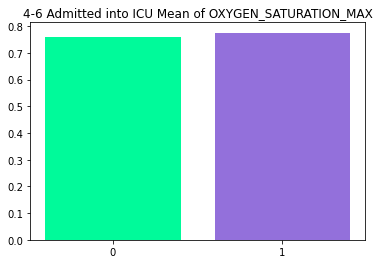

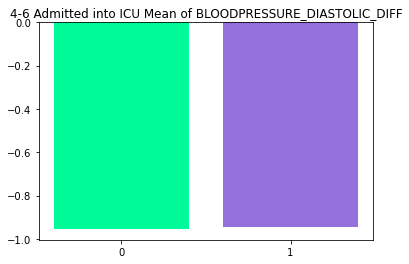

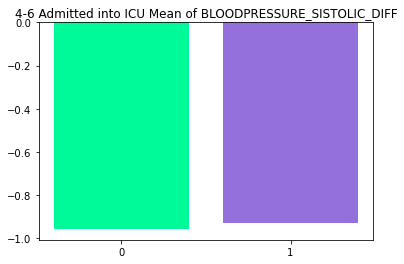

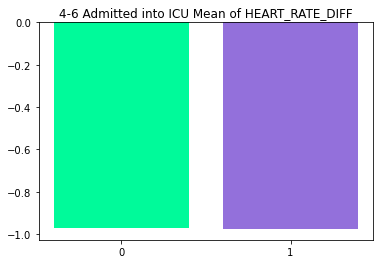

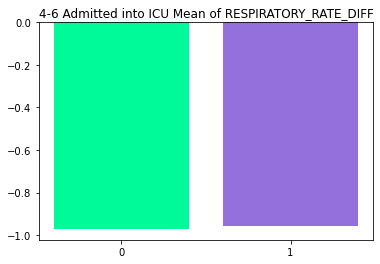

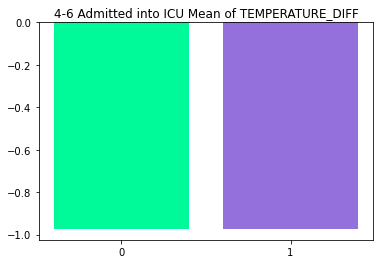

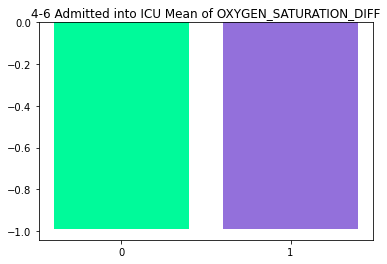

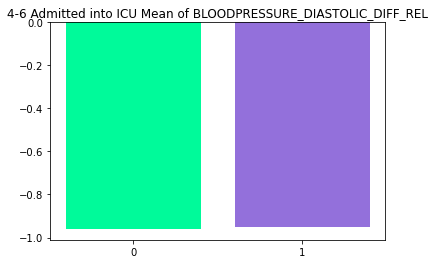

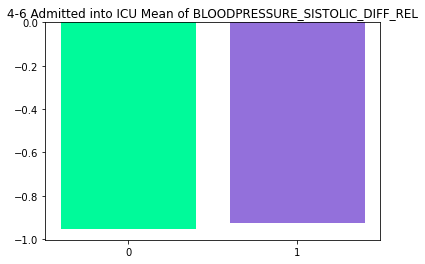

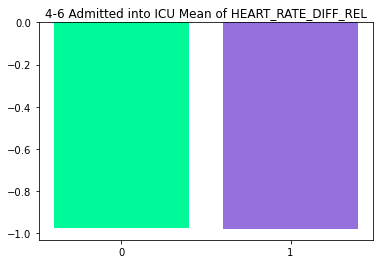

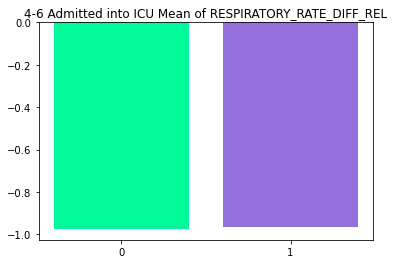

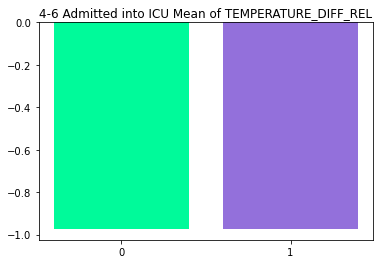

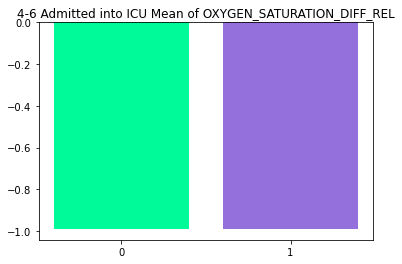

In [191]:
#  Numerical Data
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('../4-6.pdf')
heart_NUM = grouped_data.columns
g = grouped_data[grouped_data['WINDOW'] == '4-6']

for i in heart_NUM:
    fig1 = plt.figure()
    df = g[i]
    zeros = df.iloc[0]
    ones = df.iloc[1]

    y1 = [zeros]
    y2 = [ones]

    plt.title(f'4-6 Admitted into ICU Mean of {i}')
    plt.bar('0', y1, color='mediumspringgreen', label='Not Addmitted')
    plt.bar('1', y2, color='mediumpurple', label='Admitted')
    pp.savefig(fig1)



pp.close()
plt.show()

<ipython-input-192-f35b5c9ae814>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1 = plt.figure()


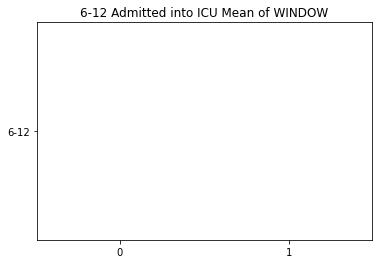

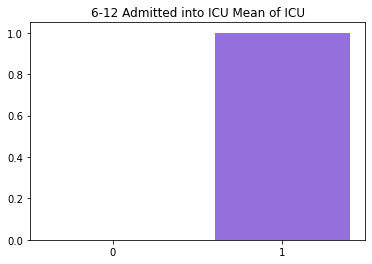

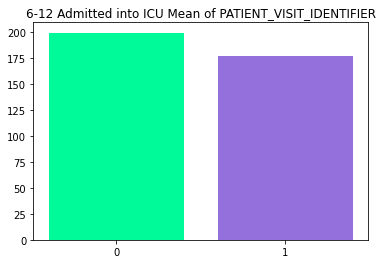

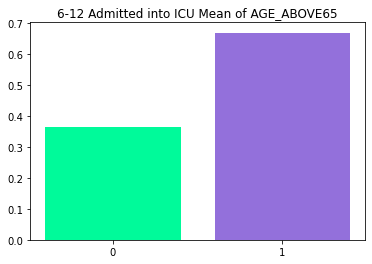

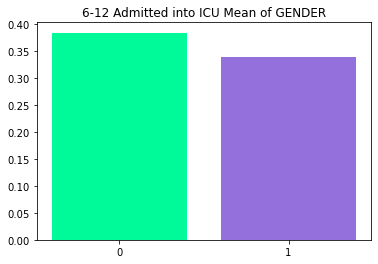

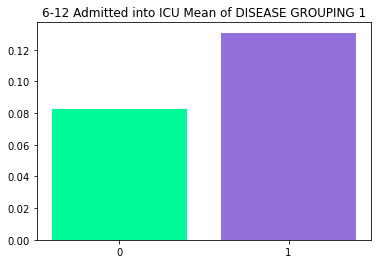

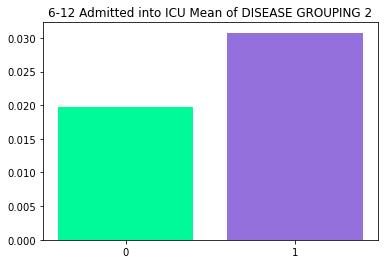

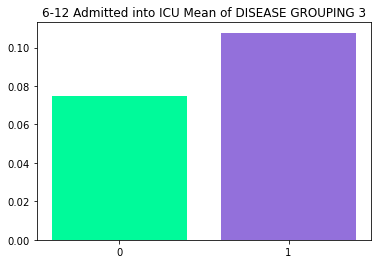

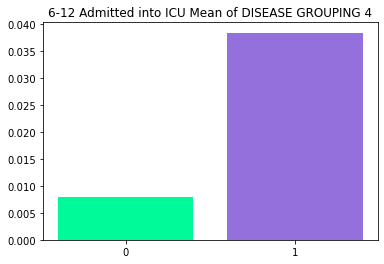

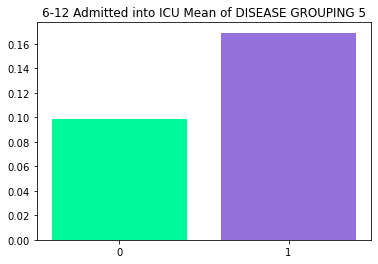

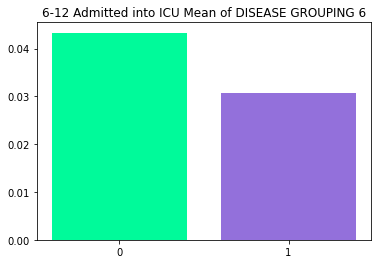

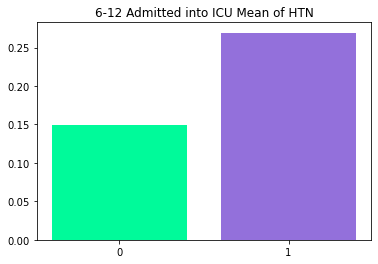

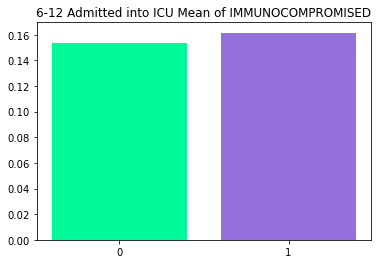

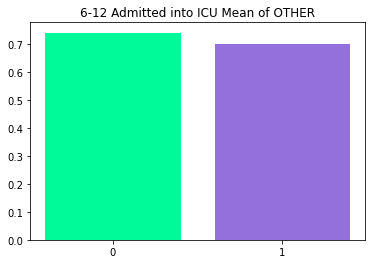

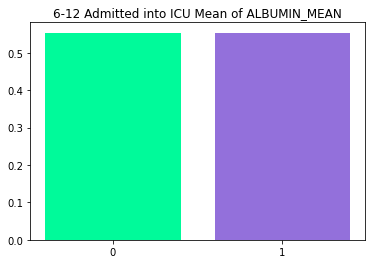

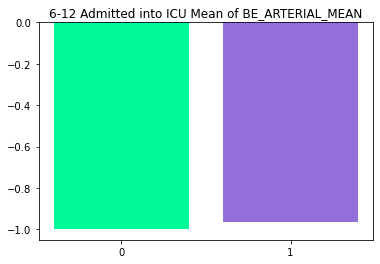

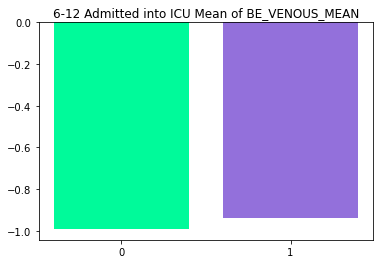

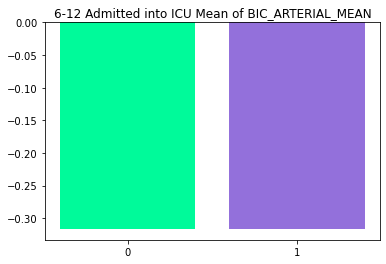

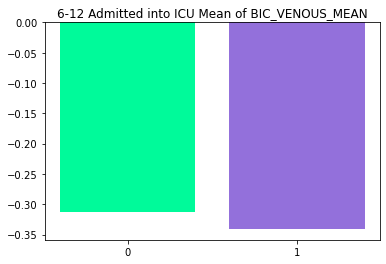

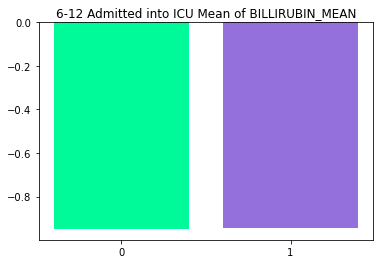

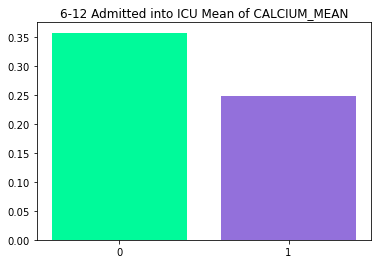

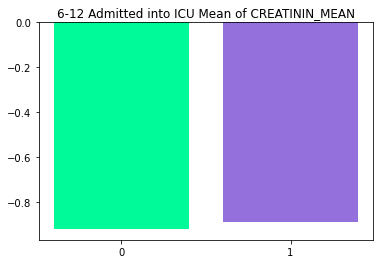

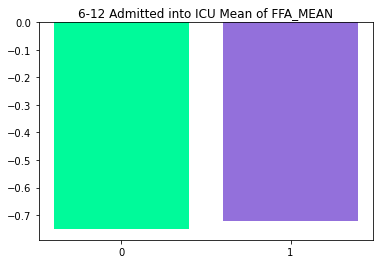

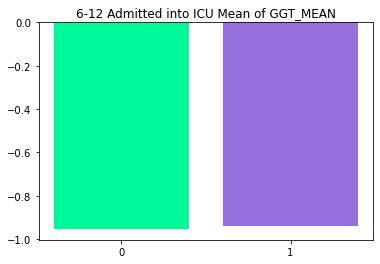

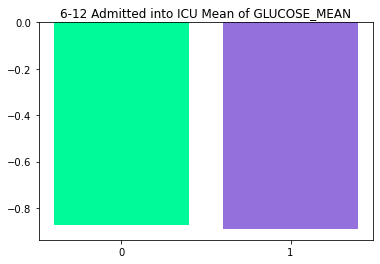

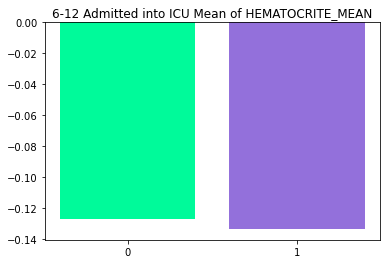

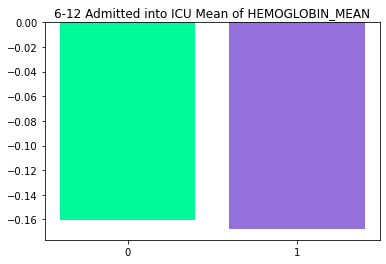

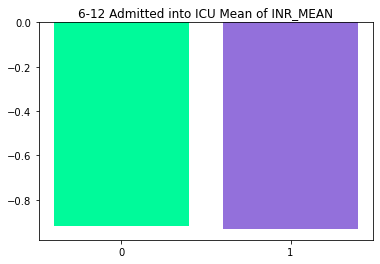

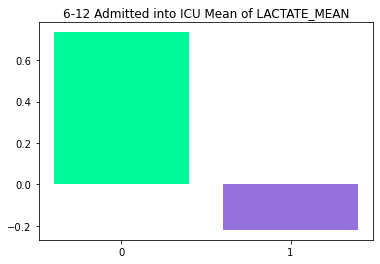

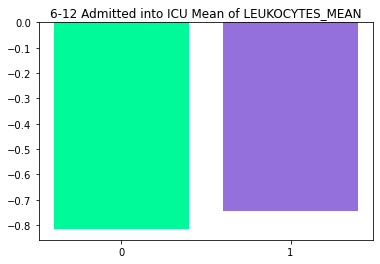

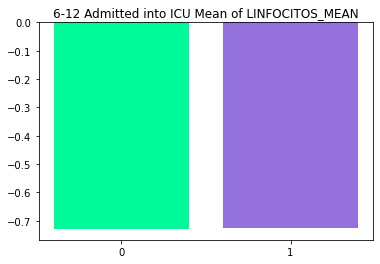

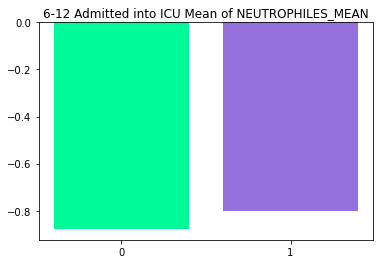

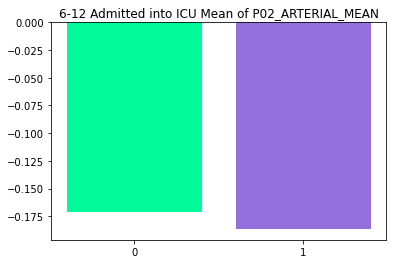

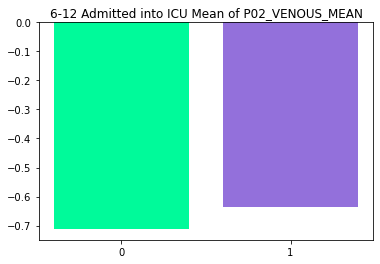

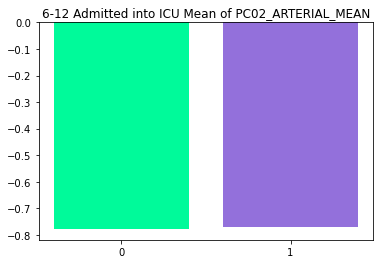

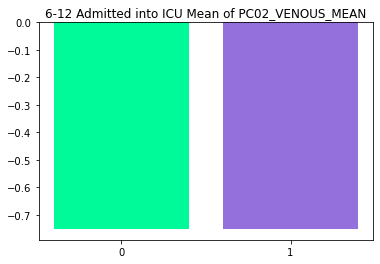

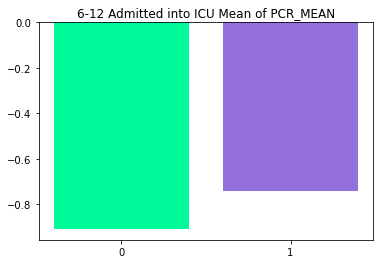

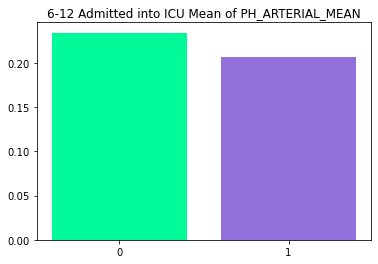

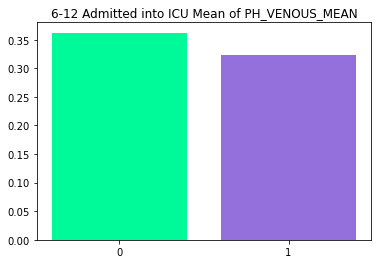

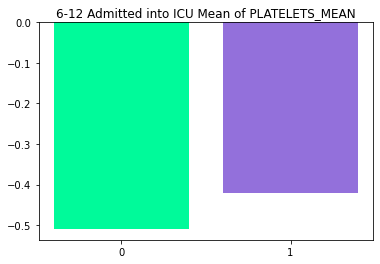

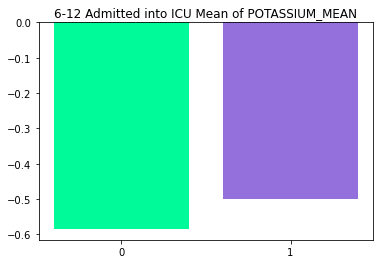

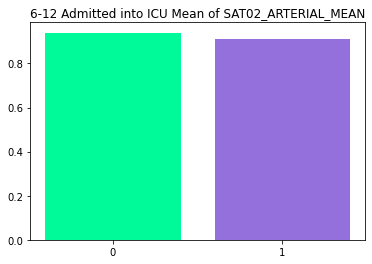

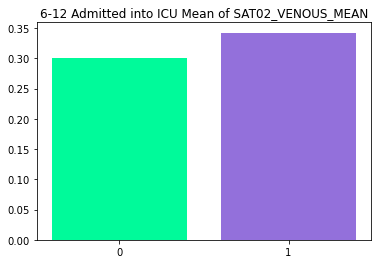

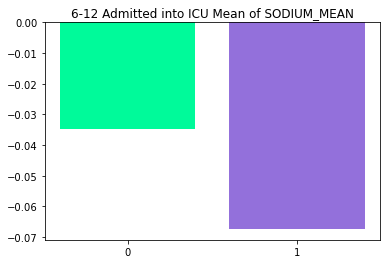

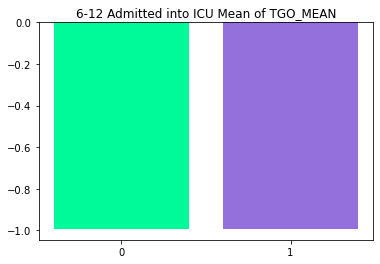

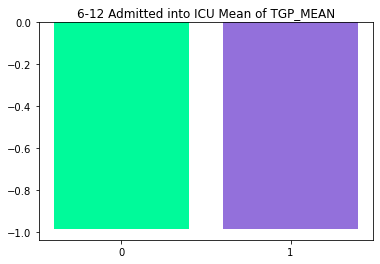

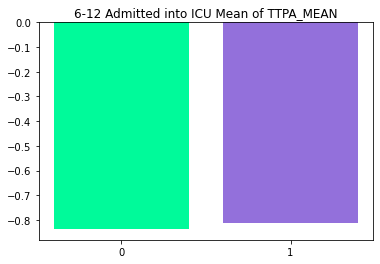

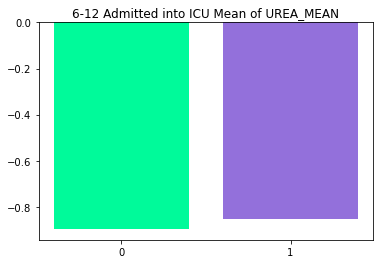

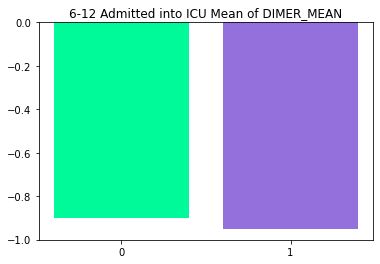

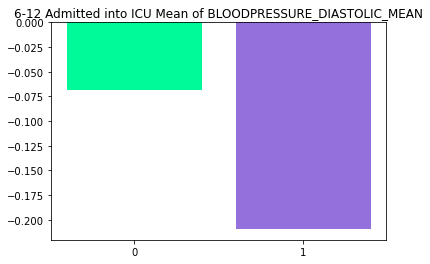

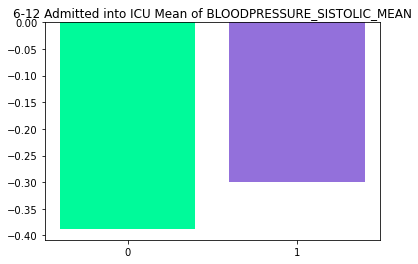

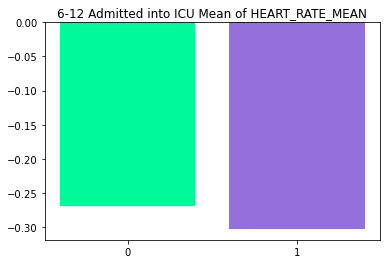

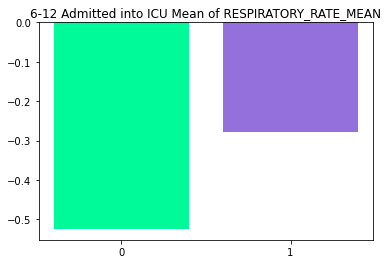

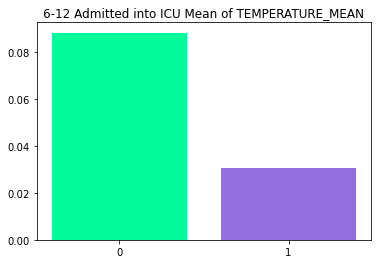

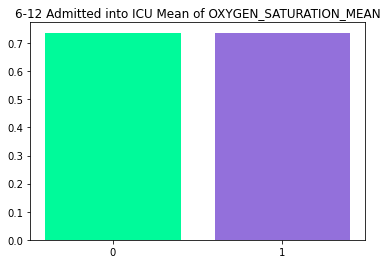

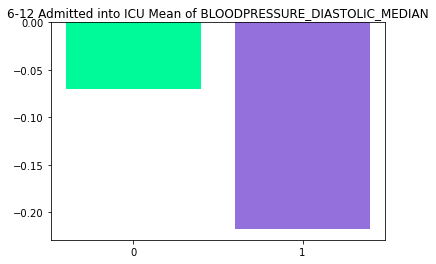

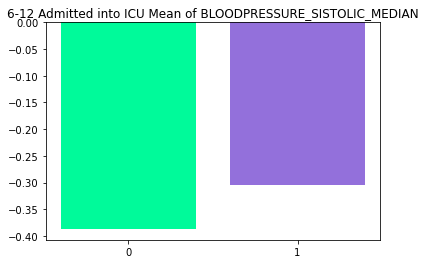

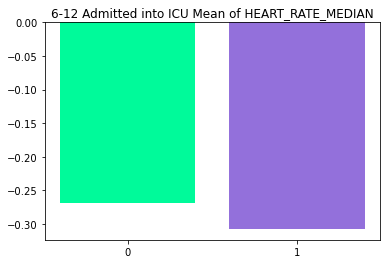

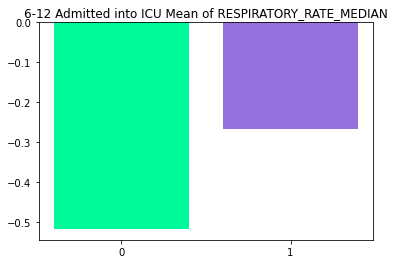

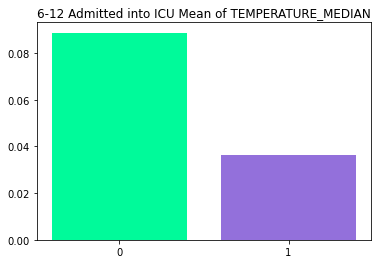

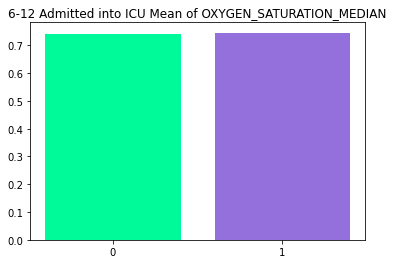

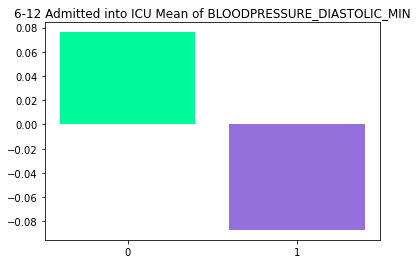

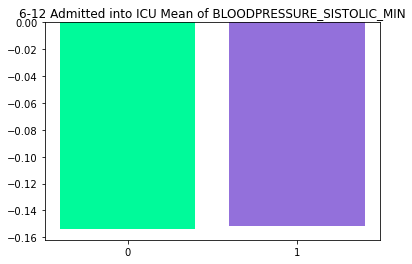

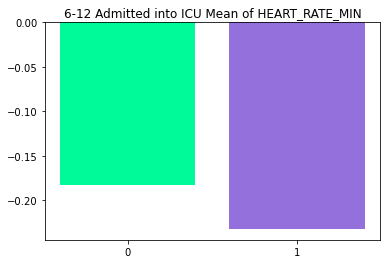

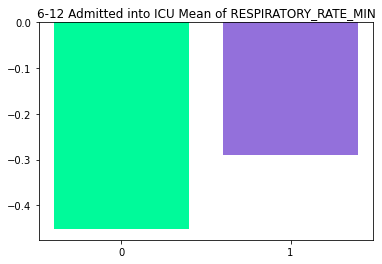

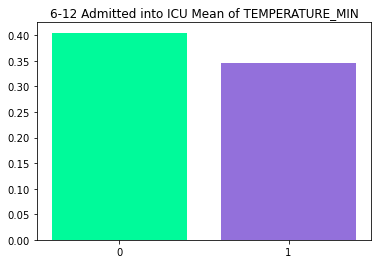

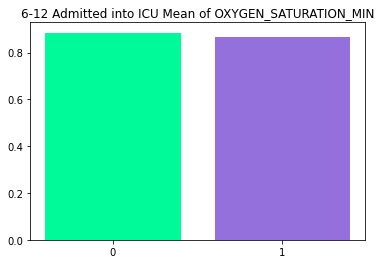

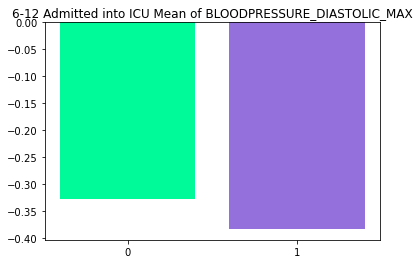

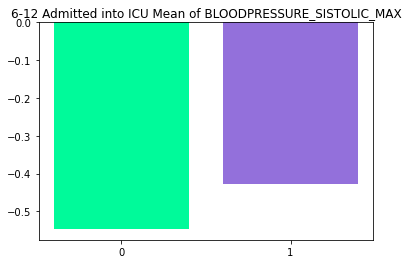

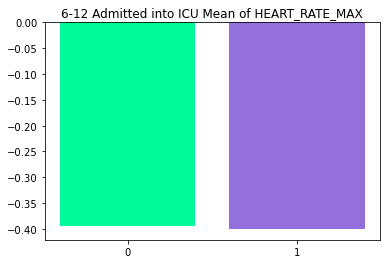

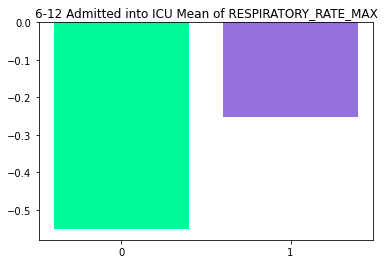

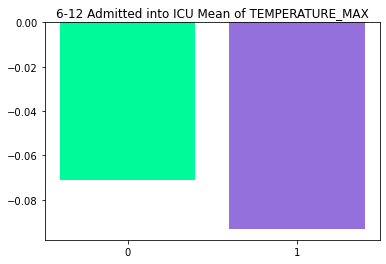

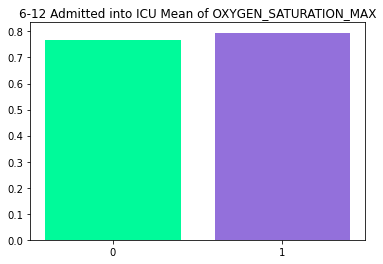

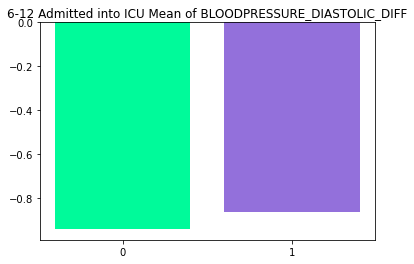

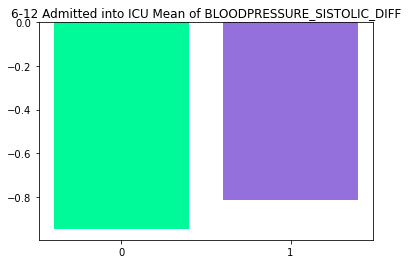

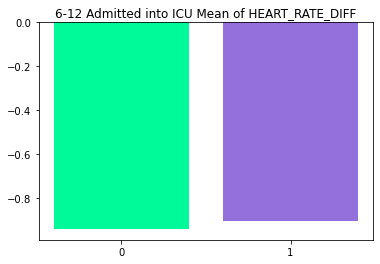

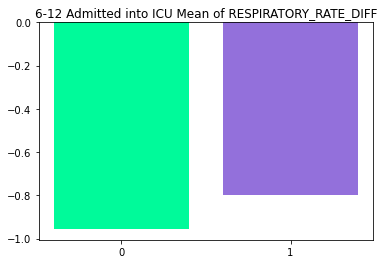

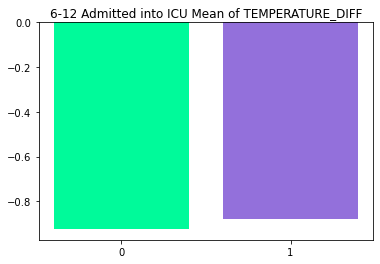

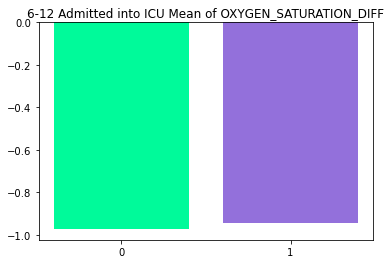

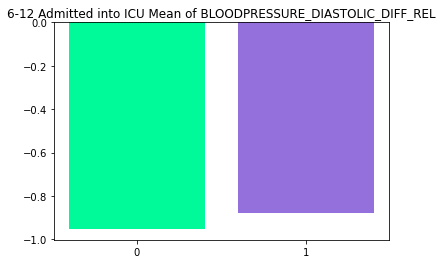

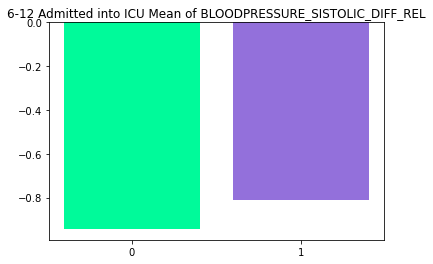

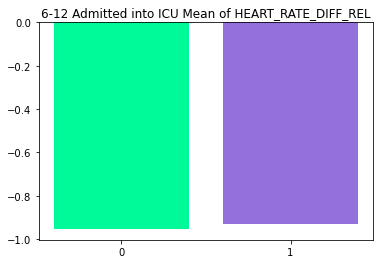

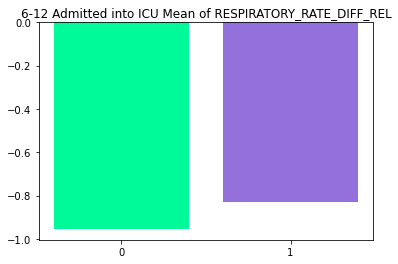

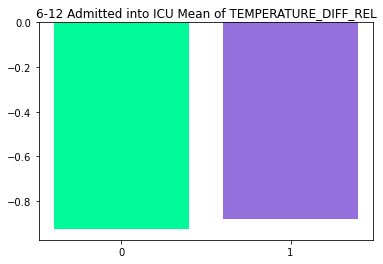

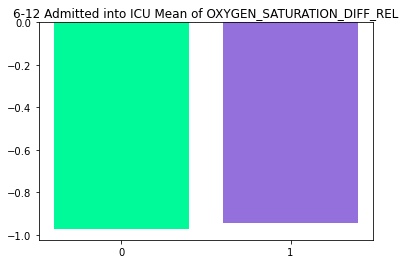

In [192]:
#  Numerical Data
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('../6-12.pdf')
heart_NUM = grouped_data.columns
g = grouped_data[grouped_data['WINDOW'] == '6-12']

for i in heart_NUM:
    fig1 = plt.figure()
    df = g[i]
    zeros = df.iloc[0]
    ones = df.iloc[1]

    y1 = [zeros]
    y2 = [ones]

    plt.title(f'6-12 Admitted into ICU Mean of {i}')
    plt.bar('0', y1, color='mediumspringgreen', label='Not Addmitted')
    plt.bar('1', y2, color='mediumpurple', label='Admitted')
    pp.savefig(fig1)



pp.close()
plt.show()

  WINDOW  ICU  PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65    GENDER  \
2    12+    0                197.078947     0.321053  0.431579   
3    12+    1                187.051282     0.610256  0.307692   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
2            0.126984            0.015873            0.079365   
3            0.158974            0.076923            0.205128   

   DISEASE GROUPING 4  DISEASE GROUPING 5  ...  HEART_RATE_DIFF  \
2            0.005291            0.095238  ...        -0.476473   
3            0.041026            0.210256  ...        -0.133921   

   RESPIRATORY_RATE_DIFF  TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  \
2              -0.659819         -0.502520               -0.820480   
3               0.227753         -0.247863               -0.548531   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
2                         -0.607336                        -0.476067   
3                         -0.234149             

<ipython-input-197-f8de125885b9>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1 = plt.figure()


2    0.357596
3    0.344624
Name: CALCIUM_MEAN, dtype: float64
2   -0.916104
3   -0.877285
Name: CREATININ_MEAN, dtype: float64
2   -0.734542
3   -0.699349
Name: FFA_MEAN, dtype: float64
2   -0.913980
3   -0.881034
Name: GGT_MEAN, dtype: float64
2   -0.880343
3   -0.856937
Name: GLUCOSE_MEAN, dtype: float64
2   -0.141719
3   -0.310780
Name: HEMATOCRITE_MEAN, dtype: float64
2   -0.183654
3   -0.372768
Name: HEMOGLOBIN_MEAN, dtype: float64
2   -0.949951
3   -0.919544
Name: INR_MEAN, dtype: float64
2    0.637037
3   -0.410951
Name: LACTATE_MEAN, dtype: float64
2   -0.774164
3   -0.670613
Name: LEUKOCYTES_MEAN, dtype: float64
2   -0.640376
3   -0.669622
Name: LINFOCITOS_MEAN, dtype: float64
2   -0.861617
3   -0.757796
Name: NEUTROPHILES_MEAN, dtype: float64
2   -0.172764
3   -0.195248
Name: P02_ARTERIAL_MEAN, dtype: float64
2   -0.683695
3   -0.634539
Name: P02_VENOUS_MEAN, dtype: float64
2   -0.781073
3   -0.770210
Name: PC02_ARTERIAL_MEAN, dtype: float64
2   -0.758078
3   -0.733666
Name:

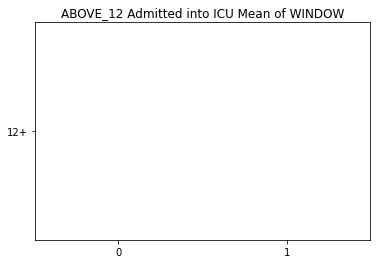

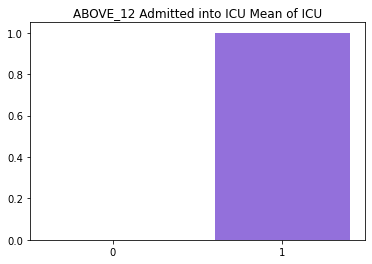

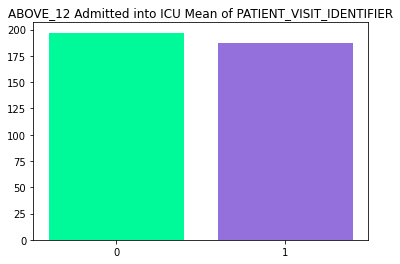

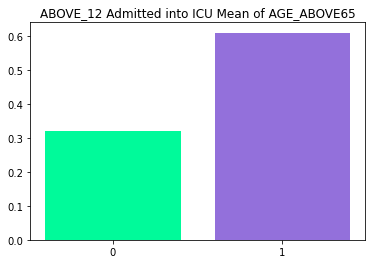

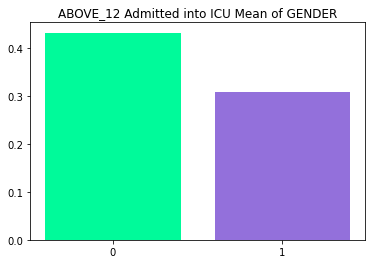

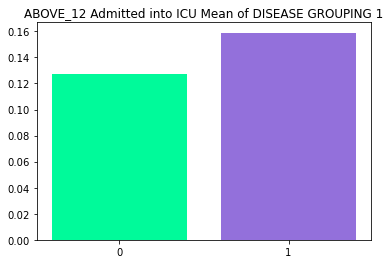

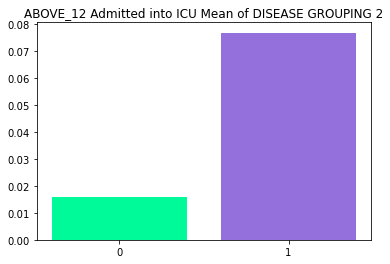

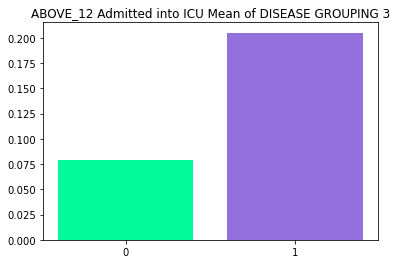

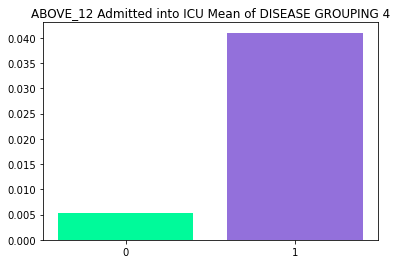

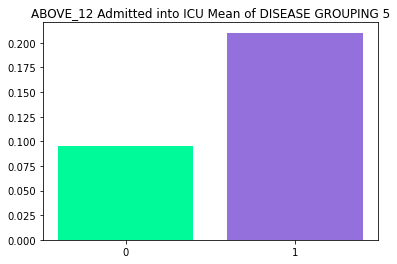

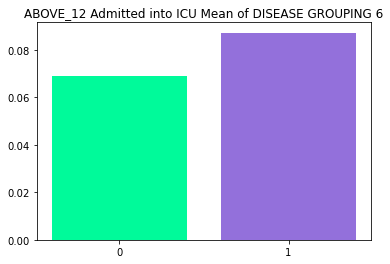

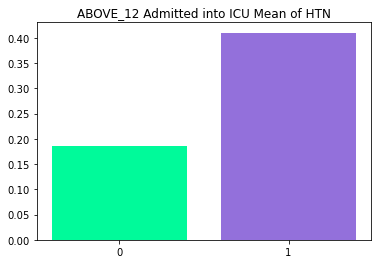

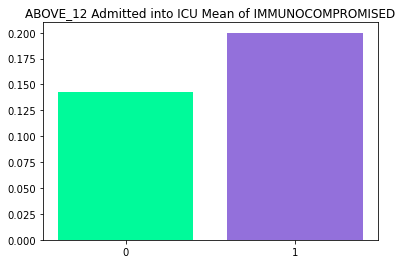

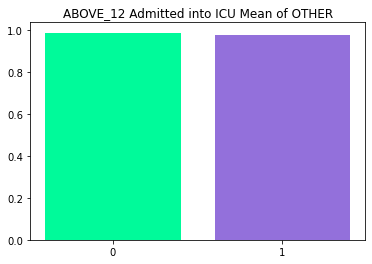

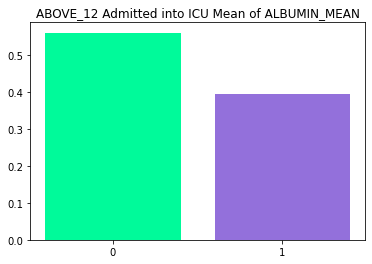

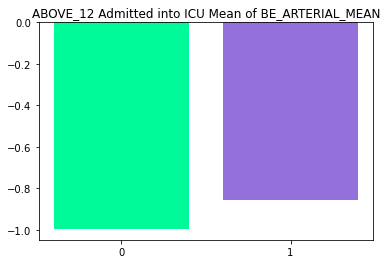

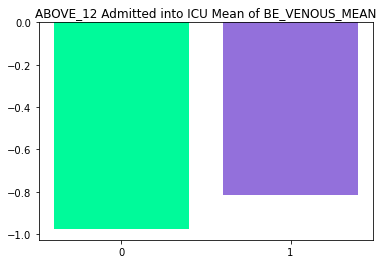

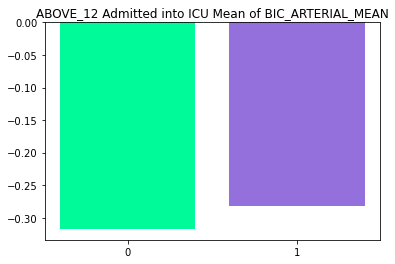

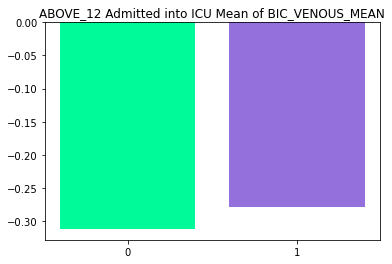

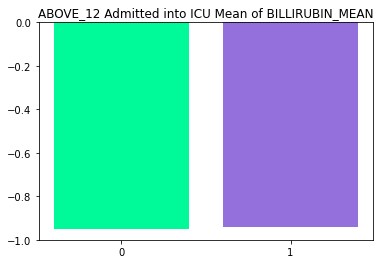

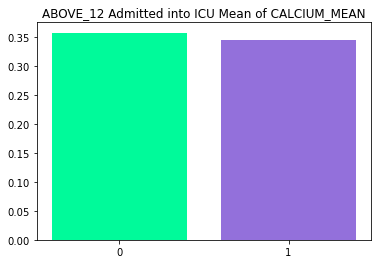

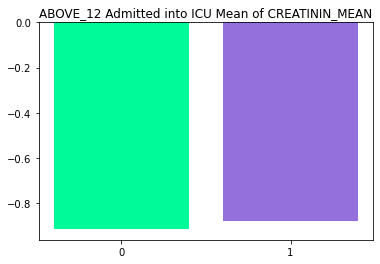

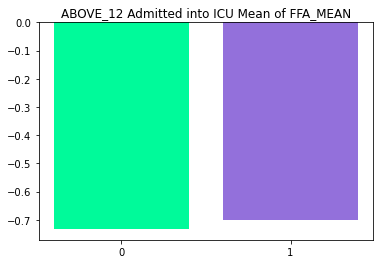

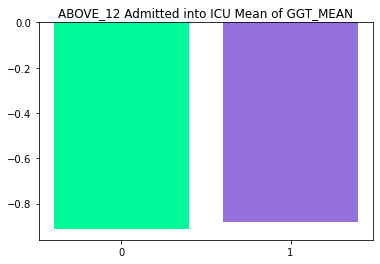

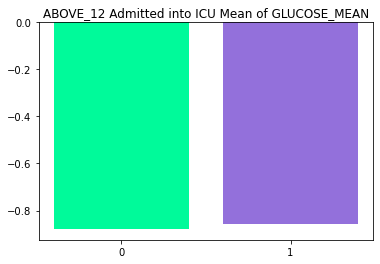

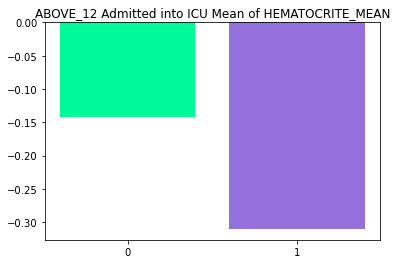

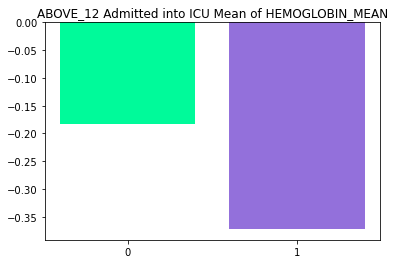

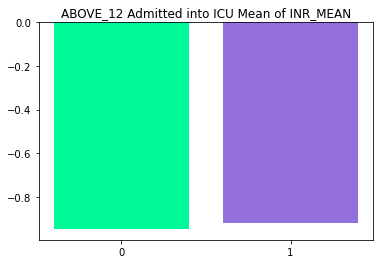

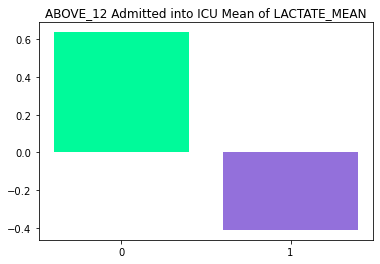

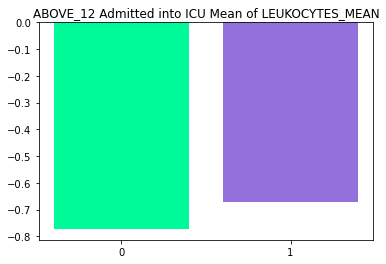

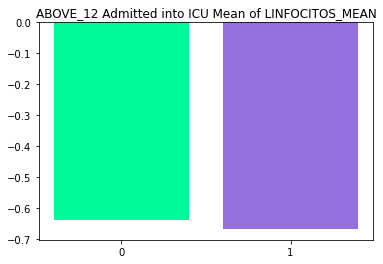

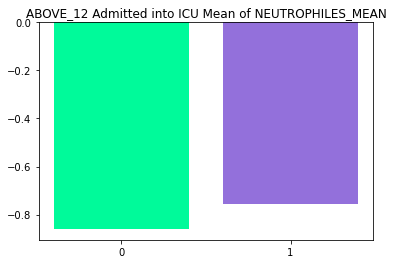

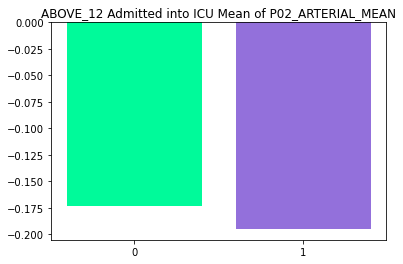

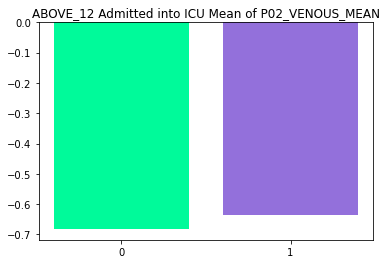

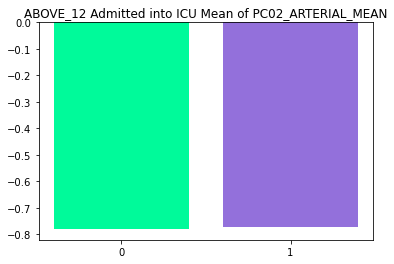

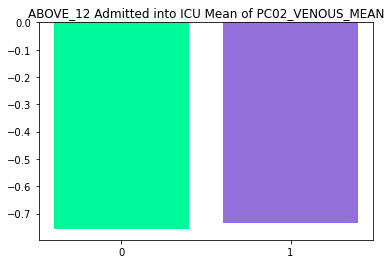

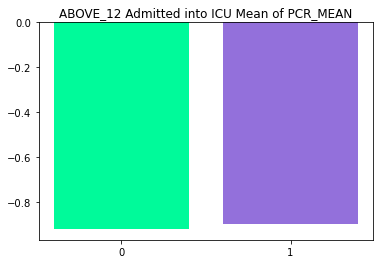

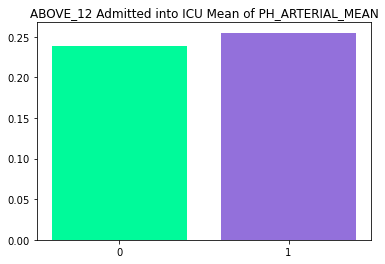

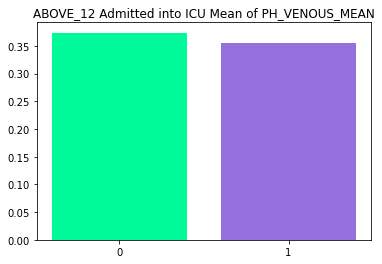

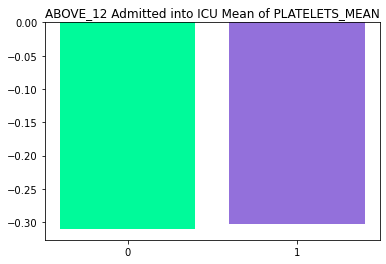

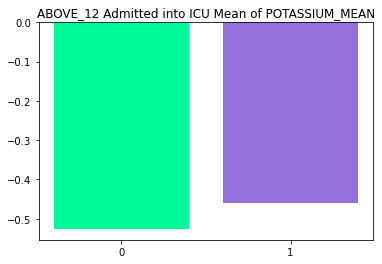

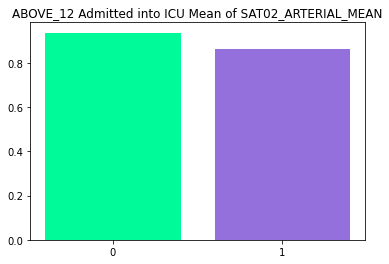

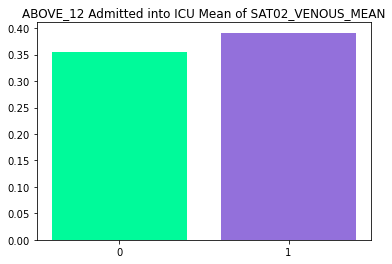

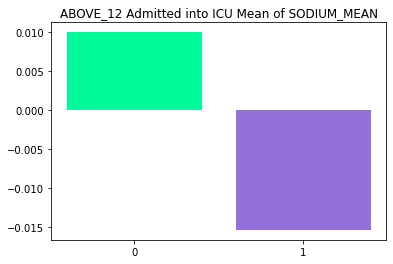

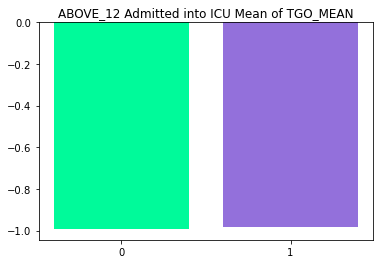

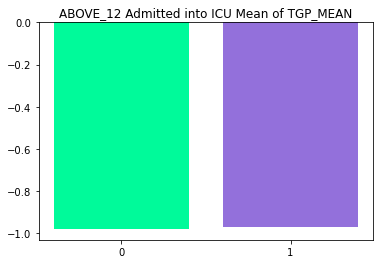

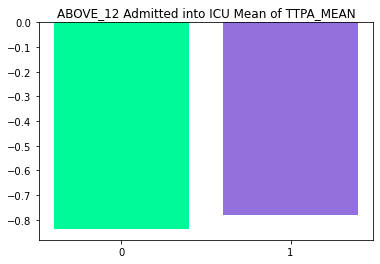

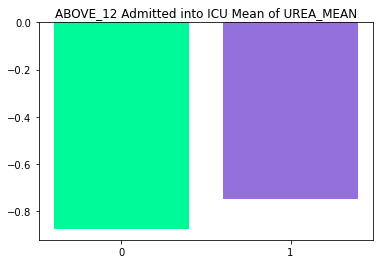

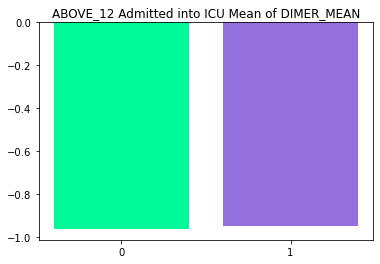

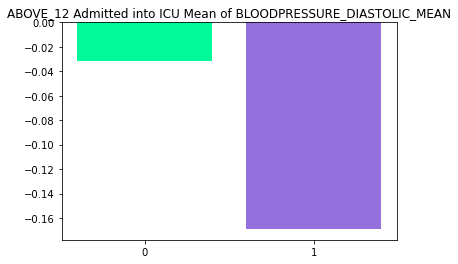

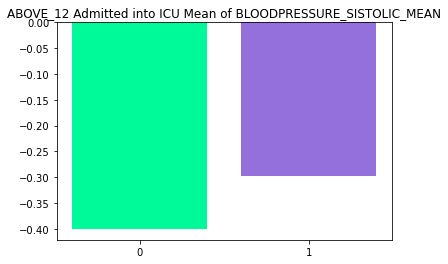

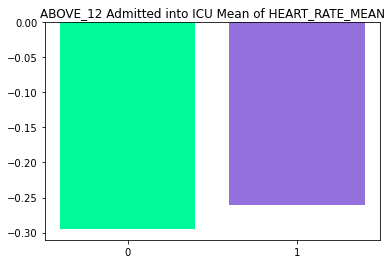

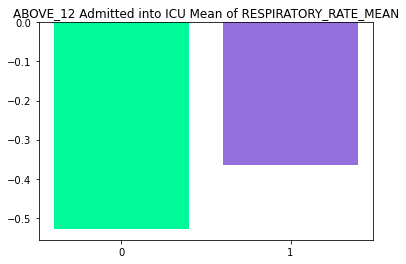

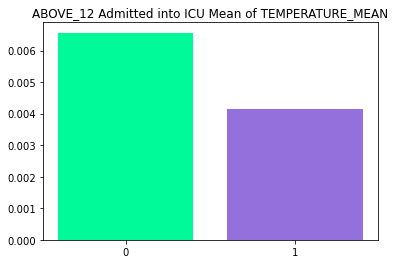

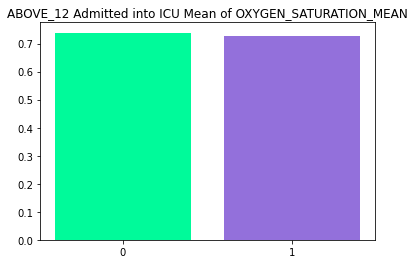

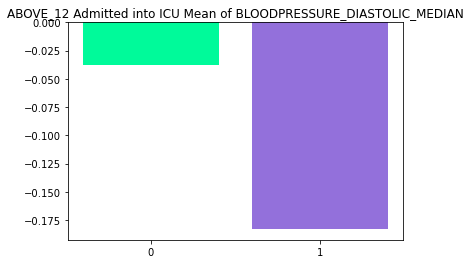

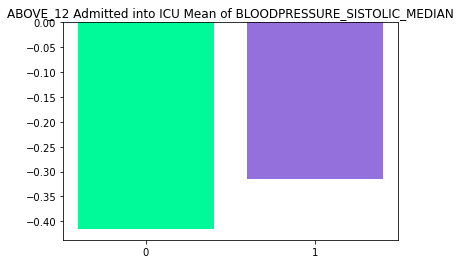

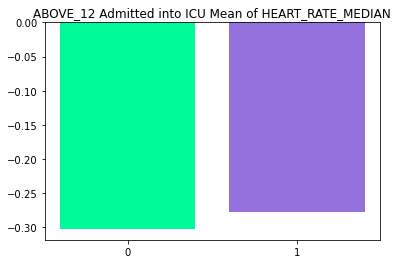

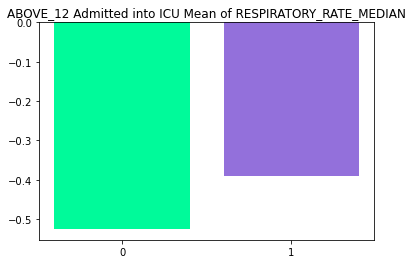

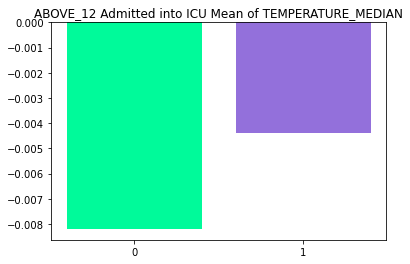

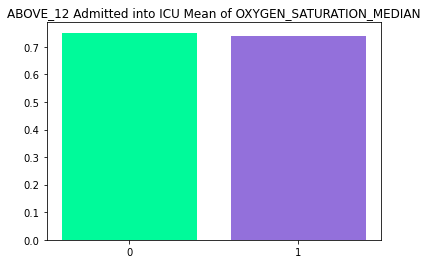

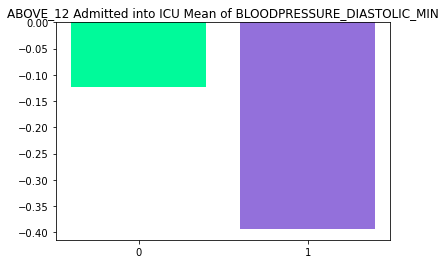

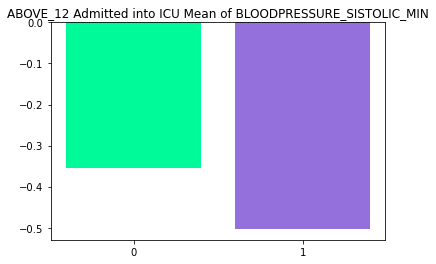

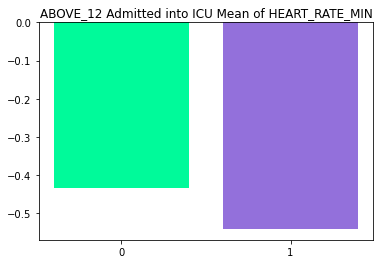

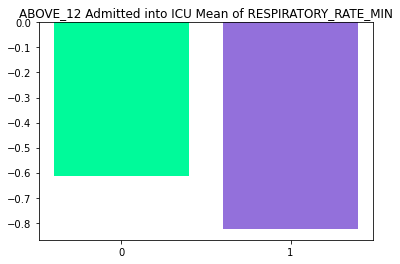

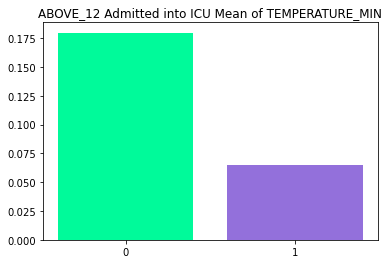

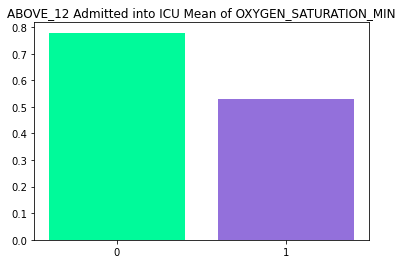

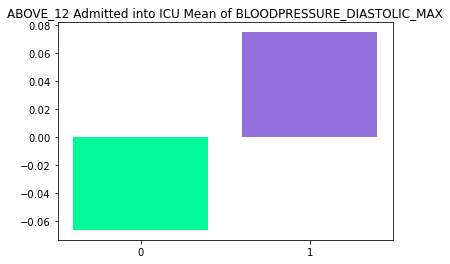

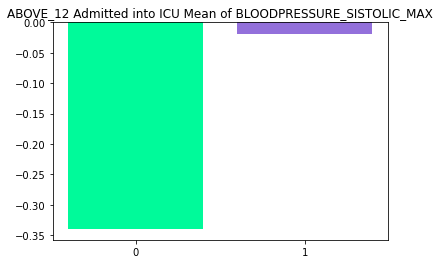

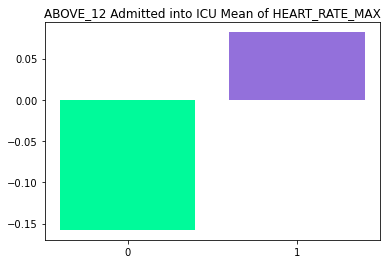

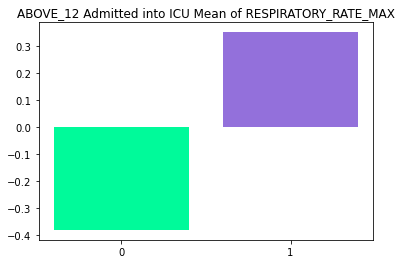

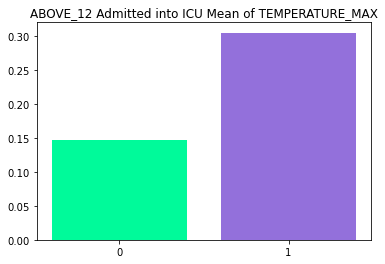

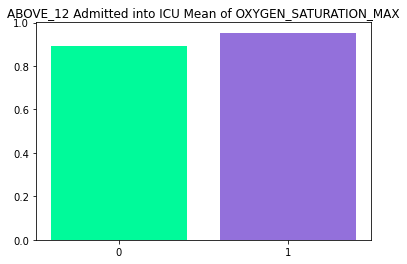

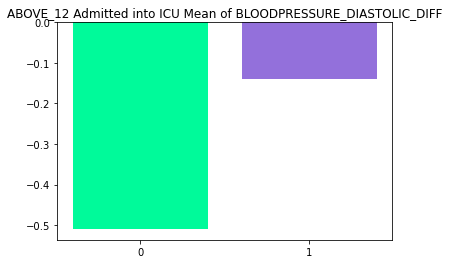

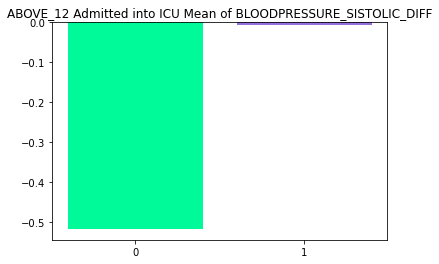

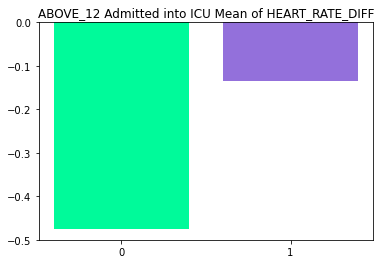

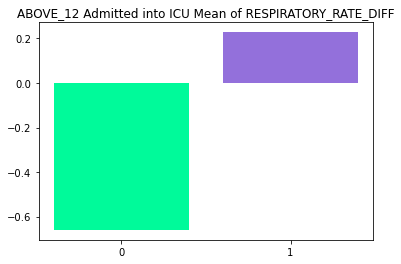

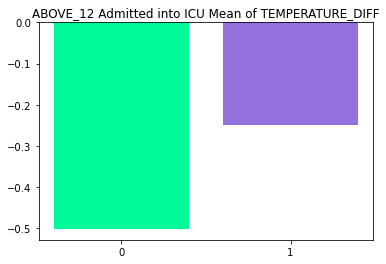

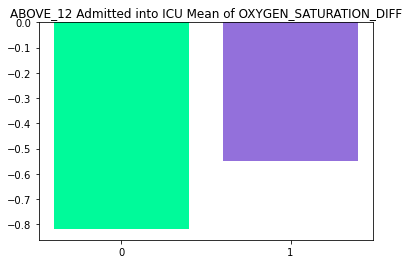

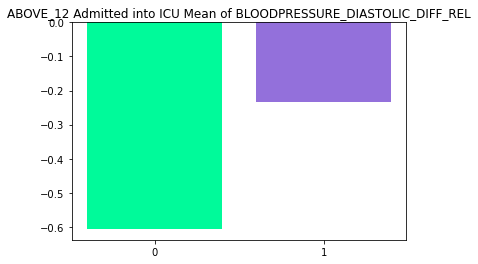

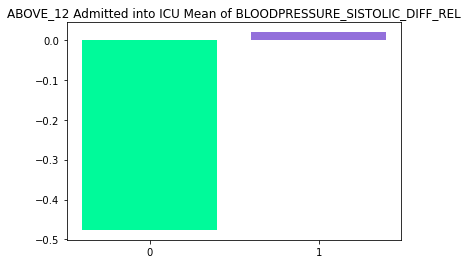

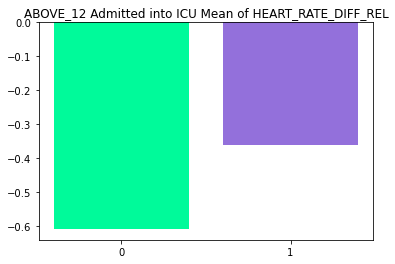

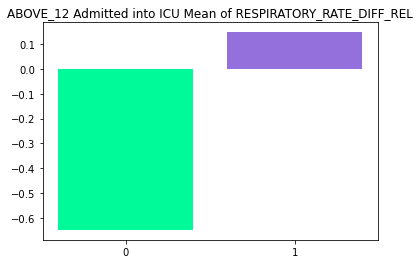

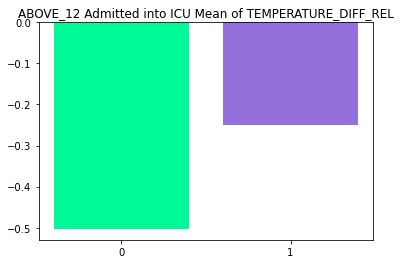

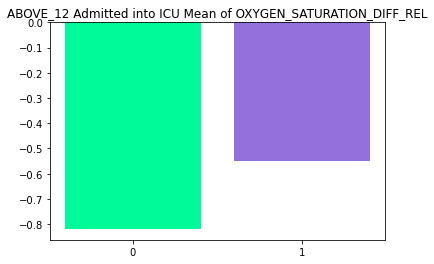

In [197]:
#  Numerical Data
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('../12+.pdf')
heart_NUM = grouped_data.columns
g = grouped_data[grouped_data['WINDOW'] == '12+']
print(g)
for i in heart_NUM:
    fig1 = plt.figure()
    df = g[i]
    print(df)
    zeros = df.iloc[0]
    ones = df.iloc[1]

    y1 = [zeros]
    y2 = [ones]

    plt.title(f'ABOVE_12 Admitted into ICU Mean of {i}')
    plt.bar('0', y1, color='mediumspringgreen', label='Not Addmitted')
    plt.bar('1', y2, color='mediumpurple', label='Admitted')
    pp.savefig(fig1)



pp.close()
plt.show()

In [196]:
data['WINDOW'].unique()

array(['0-2', '2-4', '4-6', '6-12', '12+'], dtype=object)

In [198]:
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,12+,1


In [200]:
grouped_data

# 0-2

first = grouped_data[grouped_data['WINDOW'] == '0-2']

first = first.drop(columns = 'WINDOW')
first = first.diff()
print(first.T.columns)
first = first.T
first = first.drop(columns=[0])
first[1] = first.abs()
first = first.sort_values(1, ascending=False)

first.head(20)

Int64Index([0, 1], dtype='int64')


,1
PATIENT_VISIT_IDENTIFIER,10.054444
ICU,1.000000
LACTATE_MEAN,0.861777
RESPIRATORY_RATE_MEDIAN,0.253181
RESPIRATORY_RATE_MEAN,0.232273
RESPIRATORY_RATE_MAX,0.230790
RESPIRATORY_RATE_MIN,0.206845
CREATININ_MEAN,0.157564
PCR_MEAN,0.139390
AGE_ABOVE65,0.137659


In [202]:

# 2-4

second = grouped_data[grouped_data['WINDOW'] == '2-4']

second = second.drop(columns = 'WINDOW')
second = second.diff()
print(second.T.columns)
second = second.T
second = second.drop(columns=[4])
second[5] = second.abs()
second = second.sort_values(5, ascending=False)

second.head(20)

Int64Index([4, 5], dtype='int64')


,5
PATIENT_VISIT_IDENTIFIER,1.200998
ICU,1.000000
LACTATE_MEAN,0.694346
OTHER,0.279166
AGE_ABOVE65,0.248518
RESPIRATORY_RATE_MAX,0.233776
RESPIRATORY_RATE_MEAN,0.222278
RESPIRATORY_RATE_MEDIAN,0.221574
RESPIRATORY_RATE_MIN,0.199379
PCR_MEAN,0.189143


In [204]:
# 4-6

second = grouped_data[grouped_data['WINDOW'] == '4-6']

second = second.drop(columns = 'WINDOW')
second = second.diff()
print(second.T.columns)
second = second.T
second = second.drop(columns=[6])
second[7] = second.abs()
second = second.sort_values(7, ascending=False)

second.head(20)

Int64Index([6, 7], dtype='int64')


,7
PATIENT_VISIT_IDENTIFIER,18.166278
ICU,1.000000
LACTATE_MEAN,0.884031
AGE_ABOVE65,0.268065
RESPIRATORY_RATE_MIN,0.191680
RESPIRATORY_RATE_MEDIAN,0.189504
RESPIRATORY_RATE_MEAN,0.189007
RESPIRATORY_RATE_MAX,0.179287
HTN,0.165763
OTHER,0.152259


In [208]:
third = grouped_data[grouped_data['WINDOW'] == '6-12']

third = third.drop(columns = 'WINDOW')
third = third.diff()
print(third.T.columns)
third = third.T
third = third.drop(columns=[8])
third[9] = third.abs()
third = third.sort_values(9, ascending=False)

third.head(20)

Int64Index([8, 9], dtype='int64')


,9
PATIENT_VISIT_IDENTIFIER,22.844495
ICU,1.000000
LACTATE_MEAN,0.955868
AGE_ABOVE65,0.304525
RESPIRATORY_RATE_MAX,0.299374
RESPIRATORY_RATE_MEDIAN,0.251114
RESPIRATORY_RATE_MEAN,0.246253
PCR_MEAN,0.167829
BLOODPRESSURE_DIASTOLIC_MIN,0.163230
RESPIRATORY_RATE_MIN,0.161874


In [210]:
fourth = grouped_data[grouped_data['WINDOW'] == '12+']

fourth = fourth.drop(columns = 'WINDOW')
fourth = fourth.diff()
print(fourth.T.columns)
fourth = fourth.T
fourth = fourth.drop(columns=[2])
fourth[3] = fourth.abs()
fourth = fourth.sort_values(3, ascending=False)

fourth.head(20)

Int64Index([2, 3], dtype='int64')


,3
PATIENT_VISIT_IDENTIFIER,10.027665
LACTATE_MEAN,1.047988
ICU,1.000000
RESPIRATORY_RATE_DIFF,0.887572
RESPIRATORY_RATE_DIFF_REL,0.794524
RESPIRATORY_RATE_MAX,0.732152
BLOODPRESSURE_SISTOLIC_DIFF,0.512018
BLOODPRESSURE_SISTOLIC_DIFF_REL,0.495284
BLOODPRESSURE_DIASTOLIC_DIFF_REL,0.373187
BLOODPRESSURE_DIASTOLIC_DIFF,0.371919


<h2> Continued Data Cleaning </h2>

The problem with the above is it does not show if the patient ever had ICU.

I believe since we are not ignoring the -1 values all I need to do is:

1. <s>Age Percentiles </s>
2.<s> One Hot Encode Gender</s>

3. <s>FIll na with mean</s>

4. <s>Check if dataset is well balanced</s>
5. Create if ever goes to ICU

<s> TODO: Find the Most Meaningful Features. </s>

The plan with the windows is to add the window at the end of each model


In [215]:
## Age percentiles

data.columns

print(data['AGE_PERCENTIL'].unique())

ages = {'60th':6,
        '90th': 9,
        '10th': 1,
        '40th': 4,
        '70th': 7,
        '20th': 2,
        '50th': 5,
        '80th': 8,
        '30th': 3,
 'Above 90th' : 10}

def map_age(row):
    per = row['AGE_PERCENTIL']
    mapped = ages[per]
    
    return mapped

data['age_mapped'] = data.apply(map_age,axis=1)

['60th' '90th' '10th' '40th' '70th' '20th' '50th' '80th' '30th'
 'Above 90th']


In [218]:
y = pd.get_dummies(data.GENDER, prefix='GENDER')
print(y.head())

data['GENDER_0'] = y['GENDER_0']
data['GENDER_1'] = y['GENDER_1']

   GENDER_0  GENDER_1
0         1         0
1         1         0
2         1         0
3         1         0
4         1         0


In [223]:
data = data.fillna(data.mean())

In [227]:
### Create if patient ever goes to ICU


def if_ever_icu(row):
    patient = row['PATIENT_VISIT_IDENTIFIER']
    
    patieddf = data[data['PATIENT_VISIT_IDENTIFIER'] == patient]
    
    g = patieddf[['PATIENT_VISIT_IDENTIFIER', 'ICU']].sum()
    
#     print(g['ICU'])

    if int(g['ICU']) > 0:
        return 1

    
    return 0

data['ever_icu'] = data.apply(if_ever_icu, axis=1)

In [228]:
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,age_mapped,GENDER_0,GENDER_1,ever_icu
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,6,1,0,1
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,6,1,0,1
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.817800,-0.719147,-0.771327,-0.886982,4-6,0,6,1,0,1
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.817800,-0.719147,-1.000000,-1.000000,6-12,0,6,1,0,1
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.230462,0.096774,-0.242282,-0.814433,12+,1,6,1,0,1


In [230]:
data.to_csv('../data/quay_data.csv')

In [ ]:
# sdajfikdj